In [1]:
import pandas as pd
import missingno as msno
import seaborn as sns
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings(action='ignore')
import re

print("pandas version: ", pd.__version__)
pd.set_option('display.max_columns', 150)

pandas version:  1.2.3


## solo, duo, squad 데이터 불러오기

In [2]:
solo = pd.read_csv("solo.csv",index_col=0)
duo = pd.read_csv("duo.csv",index_col=0)
squad = pd.read_csv("squad.csv",index_col=0)

In [3]:
solo

player_name  KillDeathRatio  WinRatio  TimeSurvived  RoundsPlayed  \
0          BreakNeck            3.14     17.65      18469.14            17   
1          Blackwalk            4.41     18.18      33014.86            33   
2      mercedes_benz            3.60      0.00       4330.44             5   
3               DORA           14.00     50.00      13421.82             8   
4            n2tstar           10.50     33.33       9841.04             6   
...              ...             ...       ...           ...           ...   
87893      SaikoMene            1.05      0.00      48273.92            62   
87894        KARUKOR            1.61      4.65      49006.75            43   
87895      Dertydann            1.00      0.00      14272.20            16   
87896       Neferhor            5.10     16.67      58518.86            48   
87897  pepperedangus            0.83      1.38     198473.81           217   

       Wins  WinTop10Ratio  Top10s  Top10Ratio  Losses   Rating  BestRating  \
0         3           0.83       4        23.5      14  1559.78     1415.79   
1         6           0.36      11        33.3      27  1884.53     1860.74   
2         0           0.00       1        20.0       5  1255.92     1266.60   
3         4           0.67       6        75.0       4  1798.70     1765.13   
4         2           0.40       5        83.3       4  1668.67     1616.58   
...     ...            ...     ...         ...     ...      ...         ...   
87893     0           0.00       5         8.1      62  1353.23     1484.34   
87894     2           0.22       9        20.9      41  1969.95     1965.14   
87895     0           0.00       1         6.2      16  1329.05     1341.56   
87896     8           0.44      18        37.5      40  1926.92     1944.98   
87897     3           0.03      31        14.3     214  1651.90     1659.95   

       DamagePg  HeadshotKillsPg  HealsPg  KillsPg  MoveDistancePg  RevivesPg  \
0        255.36             0.65     1.94     2.59         3321.28          0   
1        393.04             1.27     1.82     3.61         5021.41          0   
2        329.76             0.60     1.00     3.60         2804.80          0   
3        751.95             0.50     1.00     7.00         5986.82          0   
4        637.48             1.50     2.00     7.00         6526.96          0   
...         ...              ...      ...      ...             ...        ...   
87893    123.03             0.29     2.02     1.05         1859.70          0   
87894    173.08             0.40     1.26     1.53         2305.93          0   
87895    121.54             0.19     0.94     1.00         2542.69          0   
87896    491.89             1.17     1.21     4.25         3974.47          0   
87897    104.97             0.24     0.83     0.82         2461.92          0   

       RoadKillsPg  TeamKillsPg  TimeSurvivedPg  Top10sPg  Kills  Assists  \
0             0.00         0.00         1086.42      0.24     44        1   
1             0.06         0.00         1000.45      0.33    119        2   
2             0.00         0.00          866.09      0.20     18        1   
3             0.00         0.00         1677.73      0.75     56        3   
4             0.00         0.00         1640.17      0.83     42        0   
...            ...          ...             ...       ...    ...      ...   
87893         0.00         0.02          778.61      0.08     65        7   
87894         0.00         0.00         1139.69      0.21     66        6   
87895         0.06         0.00          892.01      0.06     16        0   
87896         0.02         0.04         1219.14      0.38    204       11   
87897         0.03         0.00          914.63      0.14    178       20   

       Suicides  TeamKills  HeadshotKills  HeadshotKillRatio  VehicleDestroys  \
0             0          0             11               0.25                0   
1             0          0             42               0.35   

In [4]:
duo

player_name  KillDeathRatio  WinRatio  TimeSurvived  RoundsPlayed  \
0          BreakNeck            6.50     33.33      21913.81            15   
1          Blackwalk            4.56     35.71      17765.43            14   
2      mercedes_benz            6.55     35.29      23449.22            17   
3               DORA            8.00     66.67       4196.37             3   
4            n2tstar            5.03     25.71     142571.50           105   
...              ...             ...       ...           ...           ...   
87893      SaikoMene            1.00      7.14      24717.99            28   
87894        KARUKOR            1.55      0.00      22581.61            22   
87895      Dertydann            1.01      2.54     112808.56           118   
87896       Neferhor            3.88     17.74     311229.68           248   
87897  pepperedangus            0.75      1.11      82085.84            90   

       Wins  WinTop10Ratio  Top10s  Top10Ratio  Losses   Rating  BestRating  \
0         5           0.25      10        66.7      10  2054.70     1927.91   
1         5           0.36       7        50.0       9  2097.88     2061.61   
2         6           0.30      10        58.8      11  2119.67     2052.94   
3         2           1.00       2        66.7       1  1557.90     1465.88   
4        27           0.45      60        57.1      78  2362.55     2366.20   
...     ...            ...     ...         ...     ...      ...         ...   
87893     2           0.14       7        25.0      26  1437.93     1454.48   
87894     0           0.00       7        31.8      22  1490.51     1481.65   
87895     3           0.08      27        22.9     115  1514.64     1665.96   
87896    44           0.25     121        48.8     204  2357.59     2362.52   
87897     1           0.08      16        17.8      89  1485.52     1467.20   

       DamagePg  HeadshotKillsPg  HealsPg  KillsPg  MoveDistancePg  RevivesPg  \
0        569.60             1.20     2.33     4.33         6387.27       0.13   
1        338.88             1.07     1.93     2.93         6868.74       0.14   
2        527.80             0.71     1.65     4.24         5839.70       0.12   
3        434.13             1.00     0.33     2.67         6206.07       0.33   
4        428.62             0.86     1.90     3.73         5662.43       0.25   
...         ...              ...      ...      ...             ...        ...   
87893    111.15             0.21     2.04     0.93         2774.42       0.07   
87894    247.12             0.27     1.68     1.55         2907.35       0.27   
87895    136.74             0.16     1.64     0.98         2647.89       0.13   
87896    403.87             0.59     2.06     3.19         4598.63       0.22   
87897    116.06             0.11     1.03     0.74         2746.39       0.09   

       RoadKillsPg  TeamKillsPg  TimeSurvivedPg  Top10sPg  Kills  Assists  \
0             0.00         0.00         1460.92      0.67     65       24   
1             0.00         0.14         1268.96      0.50     41       16   
2             0.00         0.06         1379.37      0.59     72       30   
3             0.00         0.00         1398.79      0.67      8        3   
4             0.02         0.00         1357.82      0.57    392       81   
...            ...          ...             ...       ...    ...      ...   
87893         0.00         0.04          882.79      0.25     26        2   
87894         0.00         0.05         1026.44      0.32     34       14   
87895         0.00         0.04          956.00      0.23    116       30   
87896         0.02         0.00         1254.96      0.49    791      176   
87897         0.00         0.01          912.06      0.18     67       11   

       Suicides  TeamKills  HeadshotKills  HeadshotKillRatio  VehicleDestroys  \
0             0          0             18               0.28                2   
1             1          2             15               0.37   

In [5]:
squad

player_name  KillDeathRatio  WinRatio  TimeSurvived  RoundsPlayed  \
0          BreakNeck            5.45     47.51    1064406.38           642   
1          Blackwalk            5.73     46.81    1176986.52           722   
2      mercedes_benz            6.08     47.34    1166679.99           733   
3               DORA            4.77     42.16     777611.90           491   
4            n2tstar            5.70     46.39     669326.90           416   
...              ...             ...       ...           ...           ...   
87893      SaikoMene            0.94      3.57      61987.40            56   
87894        KARUKOR            1.42      8.70      90025.75            92   
87895      Dertydann            0.90      1.46     126889.24           137   
87896       Neferhor            2.88     15.95     220702.25           163   
87897  pepperedangus            0.84      2.41     157247.36           166   

       Wins  WinTop10Ratio  Top10s  Top10Ratio  Losses   Rating  BestRating  \
0       305           0.29     583        90.8     337  3212.25     3208.69   
1       338           0.58     640        88.6     384  3156.94     3170.75   
2       347           0.47     654        89.2     386  3170.41     3179.38   
3       207           0.49     426        86.8     284  3078.62     3098.77   
4       193           0.53     363        87.3     223  3085.86     3092.78   
...     ...            ...     ...         ...     ...      ...         ...   
87893     2           0.05      23        41.1      54  1625.68     1648.14   
87894     8           0.07      37        40.2      84  1912.70     1923.01   
87895     2           0.18      41        29.9     135  1727.56     1758.74   
87896    26           0.41     104        63.8     137  2311.01     2311.73   
87897     4           0.05      46        27.7     162  1548.62     1562.32   

       DamagePg  HeadshotKillsPg  HealsPg  KillsPg  MoveDistancePg  RevivesPg  \
0        377.15             0.50     3.40     2.86         8091.57       0.36   
1        373.68             0.61     2.83     3.05         8381.97       0.38   
2        399.70             0.59     2.41     3.20         7625.66       0.29   
3        368.85             0.37     2.47     2.76         7733.03       0.29   
4        384.69             0.62     2.99     3.05         7741.01       0.29   
...         ...              ...      ...      ...             ...        ...   
87893    130.10             0.16     2.43     0.91         3775.38       0.27   
87894    156.96             0.14     1.55     1.29         2632.12       0.28   
87895    116.34             0.08     1.15     0.89         2804.78       0.18   
87896    348.90             0.47     2.44     2.42         5234.55       0.24   
87897    119.09             0.16     0.93     0.82         3015.69       0.17   

       RoadKillsPg  TeamKillsPg  TimeSurvivedPg  Top10sPg  Kills  Assists  \
0             0.04         0.00         1657.95      0.91   1836      892   
1             0.03         0.00         1630.18      0.89   2201      964   
2             0.03         0.01         1591.65      0.89   2348      965   
3             0.04         0.01         1583.73      0.87   1354      659   
4             0.02         0.01         1608.96      0.87   1270      490   
...            ...          ...             ...       ...    ...      ...   
87893         0.00         0.11         1106.92      0.41     51       17   
87894         0.00         0.09          978.54      0.40    119       33   
87895         0.01         0.02          926.20      0.30    122       38   
87896         0.02         0.04         1354.00      0.64    395      106   
87897         0.01         0.05          947.27      0.28    136       27   

       Suicides  TeamKills  HeadshotKills  HeadshotKillRatio  VehicleDestroys  \
0             1          3            319               0.17               56   
1             1          3            439               0.20   

### solo,duo,squad 데이터 labeling 후 데이터 row로 합치기

In [6]:
solo['GameMode'] = 'solo'
duo['GameMode'] = 'duo'
squad['GameMode'] = 'squad'

total = pd.concat([solo,duo,squad]).reset_index(drop=True)
total

player_name  KillDeathRatio  WinRatio  TimeSurvived  RoundsPlayed  \
0           BreakNeck            3.14     17.65      18469.14            17   
1           Blackwalk            4.41     18.18      33014.86            33   
2       mercedes_benz            3.60      0.00       4330.44             5   
3                DORA           14.00     50.00      13421.82             8   
4             n2tstar           10.50     33.33       9841.04             6   
...               ...             ...       ...           ...           ...   
263689      SaikoMene            0.94      3.57      61987.40            56   
263690        KARUKOR            1.42      8.70      90025.75            92   
263691      Dertydann            0.90      1.46     126889.24           137   
263692       Neferhor            2.88     15.95     220702.25           163   
263693  pepperedangus            0.84      2.41     157247.36           166   

        Wins  WinTop10Ratio  Top10s  Top10Ratio  Losses   Rating  BestRating  \
0          3           0.83       4        23.5      14  1559.78     1415.79   
1          6           0.36      11        33.3      27  1884.53     1860.74   
2          0           0.00       1        20.0       5  1255.92     1266.60   
3          4           0.67       6        75.0       4  1798.70     1765.13   
4          2           0.40       5        83.3       4  1668.67     1616.58   
...      ...            ...     ...         ...     ...      ...         ...   
263689     2           0.05      23        41.1      54  1625.68     1648.14   
263690     8           0.07      37        40.2      84  1912.70     1923.01   
263691     2           0.18      41        29.9     135  1727.56     1758.74   
263692    26           0.41     104        63.8     137  2311.01     2311.73   
263693     4           0.05      46        27.7     162  1548.62     1562.32   

        DamagePg  HeadshotKillsPg  HealsPg  KillsPg  MoveDistancePg  \
0         255.36             0.65     1.94     2.59         3321.28   
1         393.04             1.27     1.82     3.61         5021.41   
2         329.76             0.60     1.00     3.60         2804.80   
3         751.95             0.50     1.00     7.00         5986.82   
4         637.48             1.50     2.00     7.00         6526.96   
...          ...              ...      ...      ...             ...   
263689    130.10             0.16     2.43     0.91         3775.38   
263690    156.96             0.14     1.55     1.29         2632.12   
263691    116.34             0.08     1.15     0.89         2804.78   
263692    348.90             0.47     2.44     2.42         5234.55   
263693    119.09             0.16     0.93     0.82         3015.69   

        RevivesPg  RoadKillsPg  TeamKillsPg  TimeSurvivedPg  Top10sPg  Kills  \
0            0.00         0.00         0.00         1086.42      0.24     44   
1            0.00         0.06         0.00         1000.45      0.33    119   
2            0.00         0.00         0.00          866.09      0.20     18   
3            0.00         0.00         0.00         1677.73      0.75     56   
4            0.00         0.00         0.00         1640.17      0.83     42   
...           ...          ...          ...             ...       ...    ...   
263689       0.27         0.00         0.11         1106.92      0.41     51   
263690       0.28         0.00         0.09          978.54      0.40    119   
263691       0.18         0.01         0.02          926.20      0.30    122   
263692       0.24         0.02         0.04         1354.00      0.64    395   
263693       0.17         0.01         0.05          947.27      0.28    136   

        Assists  Suicides  TeamKills  HeadshotKills  HeadshotKillRatio  \
0             1         0          0             11               0.25   
1             2         0          0             42               0.35   
2             1         0          0              3             

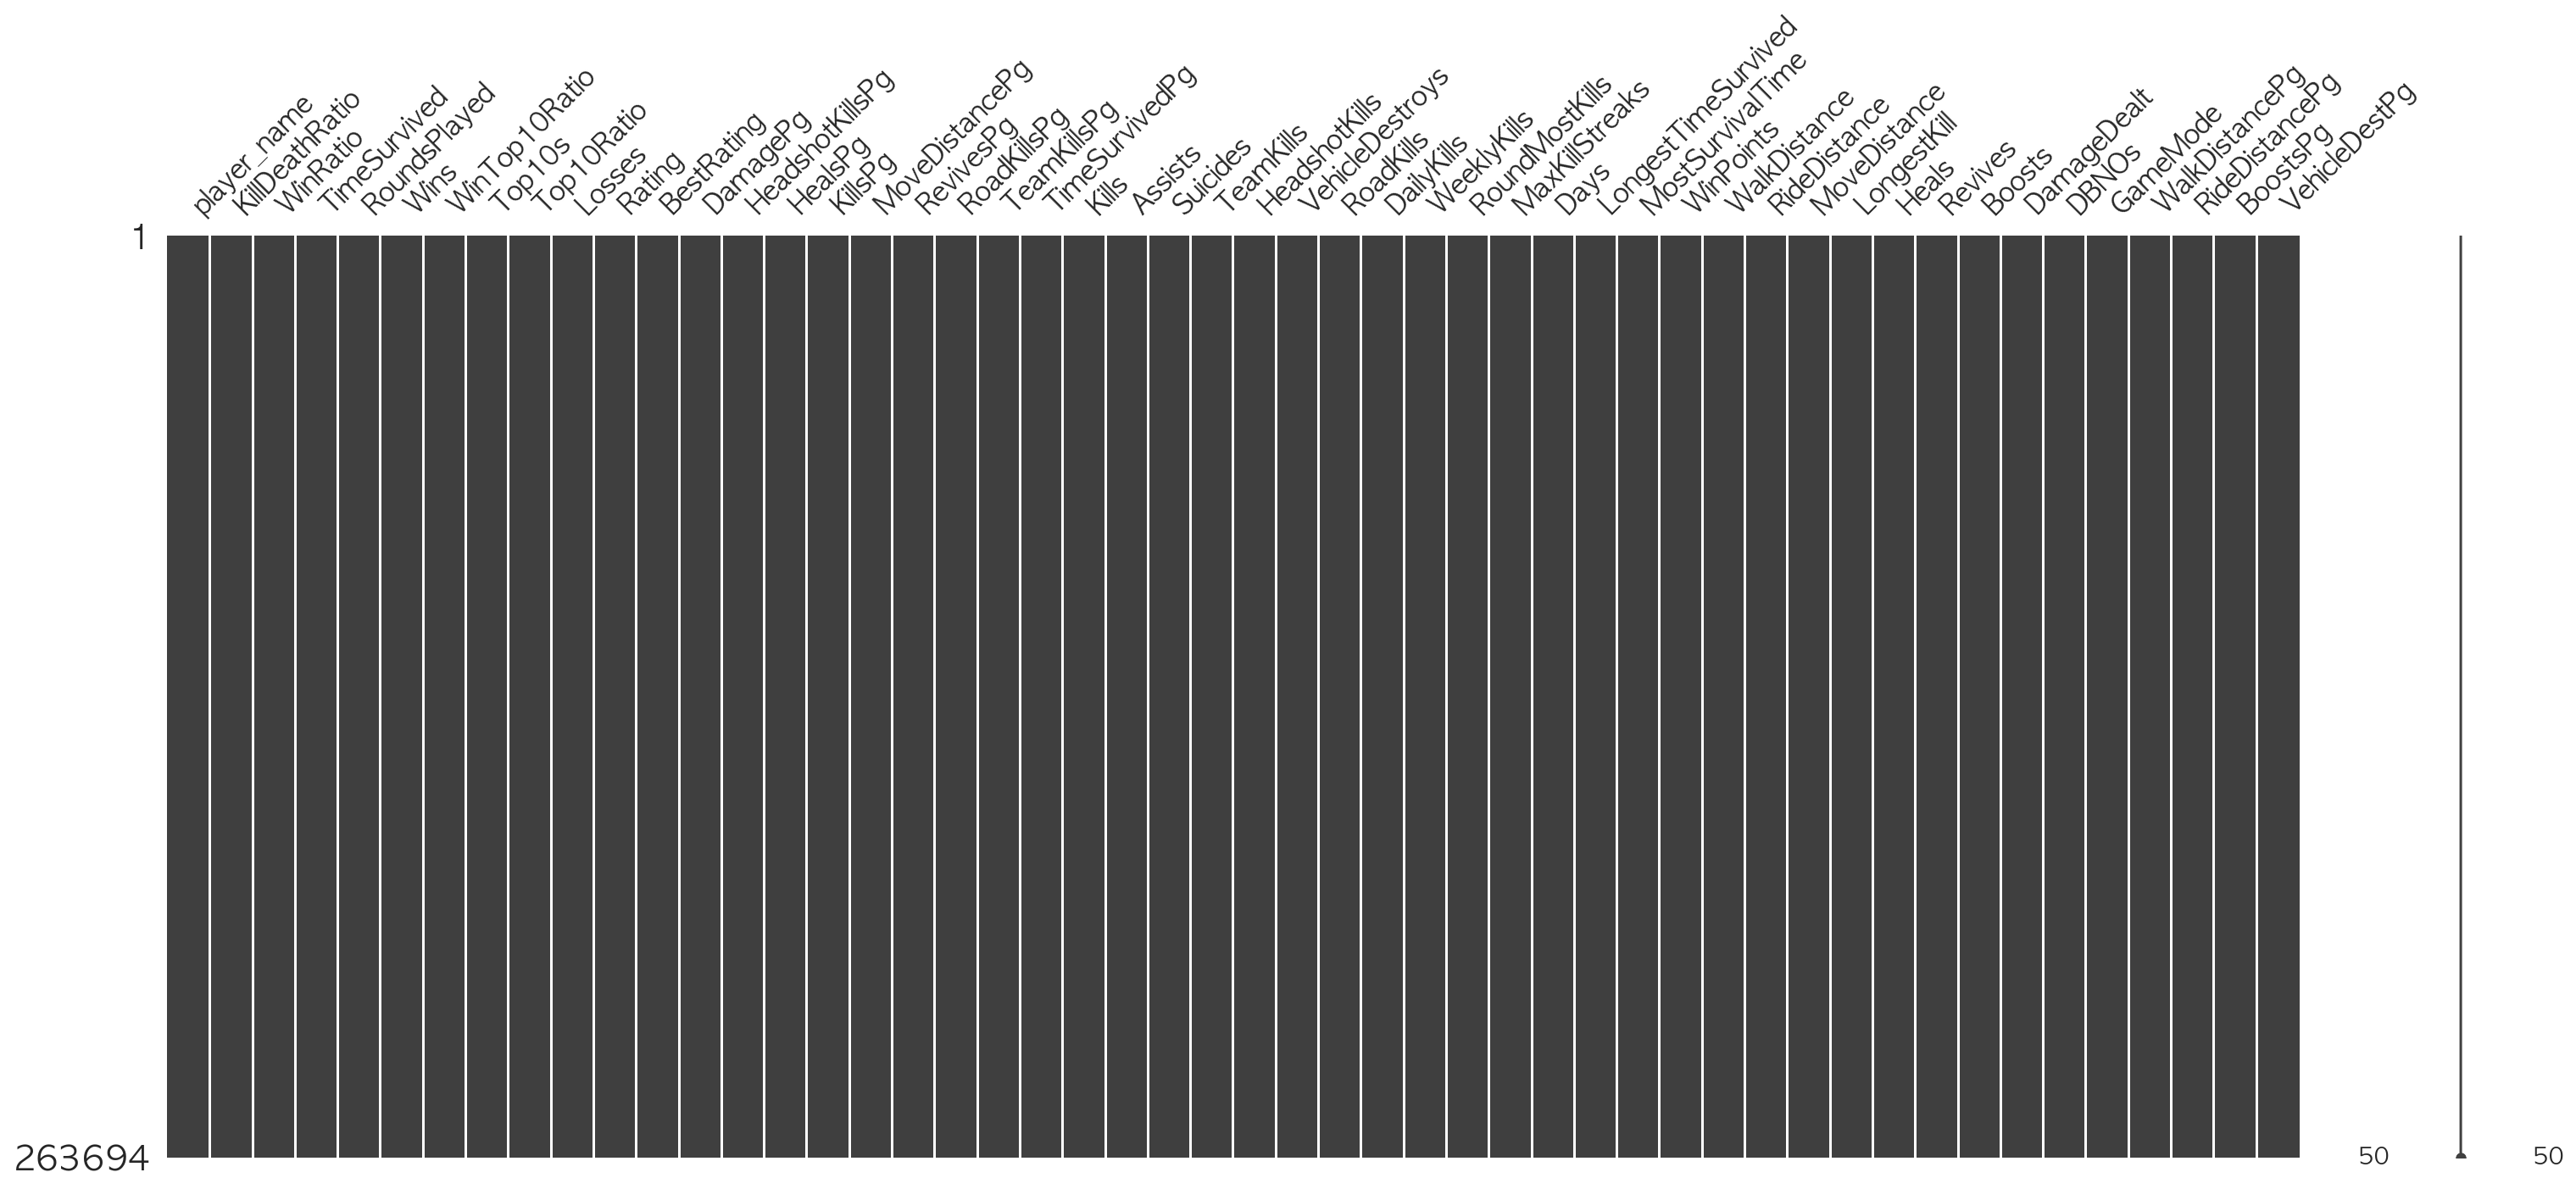

In [74]:
msno.matrix(total)
plt.show()

### 연속형 데이터를 범주화 하는 경우가 많아서 함수로 만듦 

In [7]:
def create_range_data(df, col, bins_start, bins_end, bins_jump):
    df[f'{col}_range'] = pd.cut(df[f'{col}'],
                               bins=range(bins_start,bins_end+1,bins_jump),
                               include_lowest=True,
                               labels=range(bins_start+bins_jump,bins_end+1,bins_jump))
    
def drop_col(df, col):
    df.drop([f'{col}_range'], axis=1, inplace=True)

### data 전처리

In [8]:
import re

#column 삭제
total.drop(columns=['HeadshotKillRatio','Top10sPg'],inplace=True)


pg_regexp = re.compile(r"Pg")
ratio_regexp = re.compile(r"Ratio")
avg_regexp = re.compile(r"Avg")

#컬럼 추가
total["WalkDistancePg"] =  total["WalkDistance"]/total["RoundsPlayed"]
total["RideDistancePg"] =  total["RideDistance"]/total["RoundsPlayed"]
total["WinRatio"] =  total["Wins"]/total["RoundsPlayed"]
total["BoostsPg"] = total["Boosts"] / total["RoundsPlayed"]
total["VehicleDestPg"] = total["VehicleDestroys"] / total["RoundsPlayed"]

#의미없는 컬럼 삭제
total.drop(columns=['AvgSurvivalTime', 'AvgWalkDistance','AvgRideDistance'], axis=1, inplace=True)

ls = total.columns

PgRatio_col = []
normal_col = []

for data in ls: 
    if ratio_regexp.search(data):
        PgRatio_col.append(data)
    elif pg_regexp.search(data):
        PgRatio_col.append(data)
    elif avg_regexp.search(data):
        avg_col.append(data)
    else:
        normal_col.append(data)

#normal컬럼을 ratio 데이터셋으로 이동
ls_test = ['BestRating','Rating','DailyKills','WeeklyKills','RoundMostKills','MaxKillStreaks',
     'LongestTimeSurvived','LongestKill']
for i in ls_test:
    PgRatio_col.append(i)

#player name컬럼을 ratio데이터셋에 추가
PgRatio_col.append("player_name")
PgRatio_col.append("GameMode")
total_ratio_cols = total[PgRatio_col].columns

total_ratio = total[total_ratio_cols]

#kd에 따른 데이터범주화
total_ratio.loc[total_ratio['KillDeathRatio']<=1, 'K/D_category'] = "초보"
total_ratio.loc[(total_ratio['KillDeathRatio']>1)&(total_ratio['KillDeathRatio']<=2), 'K/D_category'] = "보통"
total_ratio.loc[(total_ratio['KillDeathRatio']>2)&(total_ratio['KillDeathRatio']<=3), 'K/D_category'] = "고수"
total_ratio.loc[total_ratio['KillDeathRatio']>3, 'K/D_category'] = "초고수"


#승률 범주화
create_range_data(total_ratio,'Top10Ratio',0,100,10)
total_ratio['WinRaio_GoodBad'] = 0
total_ratio.loc[total_ratio['Top10Ratio_range']>=40, 'WinRaio_GoodBad'] = "good"
total_ratio.loc[total_ratio['Top10Ratio_range']<=40, 'WinRaio_GoodBad'] = "bad"

In [9]:
total

player_name  KillDeathRatio  WinRatio  TimeSurvived  RoundsPlayed  \
0           BreakNeck            3.14  0.176471      18469.14            17   
1           Blackwalk            4.41  0.181818      33014.86            33   
2       mercedes_benz            3.60  0.000000       4330.44             5   
3                DORA           14.00  0.500000      13421.82             8   
4             n2tstar           10.50  0.333333       9841.04             6   
...               ...             ...       ...           ...           ...   
263689      SaikoMene            0.94  0.035714      61987.40            56   
263690        KARUKOR            1.42  0.086957      90025.75            92   
263691      Dertydann            0.90  0.014599     126889.24           137   
263692       Neferhor            2.88  0.159509     220702.25           163   
263693  pepperedangus            0.84  0.024096     157247.36           166   

        Wins  WinTop10Ratio  Top10s  Top10Ratio  Losses   Rating  BestRating  \
0          3           0.83       4        23.5      14  1559.78     1415.79   
1          6           0.36      11        33.3      27  1884.53     1860.74   
2          0           0.00       1        20.0       5  1255.92     1266.60   
3          4           0.67       6        75.0       4  1798.70     1765.13   
4          2           0.40       5        83.3       4  1668.67     1616.58   
...      ...            ...     ...         ...     ...      ...         ...   
263689     2           0.05      23        41.1      54  1625.68     1648.14   
263690     8           0.07      37        40.2      84  1912.70     1923.01   
263691     2           0.18      41        29.9     135  1727.56     1758.74   
263692    26           0.41     104        63.8     137  2311.01     2311.73   
263693     4           0.05      46        27.7     162  1548.62     1562.32   

        DamagePg  HeadshotKillsPg  HealsPg  KillsPg  MoveDistancePg  \
0         255.36             0.65     1.94     2.59         3321.28   
1         393.04             1.27     1.82     3.61         5021.41   
2         329.76             0.60     1.00     3.60         2804.80   
3         751.95             0.50     1.00     7.00         5986.82   
4         637.48             1.50     2.00     7.00         6526.96   
...          ...              ...      ...      ...             ...   
263689    130.10             0.16     2.43     0.91         3775.38   
263690    156.96             0.14     1.55     1.29         2632.12   
263691    116.34             0.08     1.15     0.89         2804.78   
263692    348.90             0.47     2.44     2.42         5234.55   
263693    119.09             0.16     0.93     0.82         3015.69   

        RevivesPg  RoadKillsPg  TeamKillsPg  TimeSurvivedPg  Kills  Assists  \
0            0.00         0.00         0.00         1086.42     44        1   
1            0.00         0.06         0.00         1000.45    119        2   
2            0.00         0.00         0.00          866.09     18        1   
3            0.00         0.00         0.00         1677.73     56        3   
4            0.00         0.00         0.00         1640.17     42        0   
...           ...          ...          ...             ...    ...      ...   
263689       0.27         0.00         0.11         1106.92     51       17   
263690       0.28         0.00         0.09          978.54    119       33   
263691       0.18         0.01         0.02          926.20    122       38   
263692       0.24         0.02         0.04         1354.00    395      106   
263693       0.17         0.01         0.05          947.27    136       27   

        Suicides  TeamKills  HeadshotKills  VehicleDestroys  RoadKills  \
0              0          0             11                0          0   
1              0          0             42                3          2   
2              0          0              3                0          0   
3 

In [35]:
normal_col

['player_name',
 'TimeSurvived',
 'RoundsPlayed',
 'Wins',
 'Top10s',
 'Losses',
 'Rating',
 'BestRating',
 'Kills',
 'Assists',
 'Suicides',
 'TeamKills',
 'HeadshotKills',
 'VehicleDestroys',
 'RoadKills',
 'DailyKills',
 'WeeklyKills',
 'RoundMostKills',
 'MaxKillStreaks',
 'Days',
 'LongestTimeSurvived',
 'MostSurvivalTime',
 'WinPoints',
 'WalkDistance',
 'RideDistance',
 'MoveDistance',
 'LongestKill',
 'Heals',
 'Revives',
 'Boosts',
 'DamageDealt',
 'DBNOs',
 'GameMode']

In [36]:
PgRatio_col

['KillDeathRatio',
 'WinRatio',
 'WinTop10Ratio',
 'Top10Ratio',
 'DamagePg',
 'HeadshotKillsPg',
 'HealsPg',
 'KillsPg',
 'MoveDistancePg',
 'RevivesPg',
 'RoadKillsPg',
 'TeamKillsPg',
 'TimeSurvivedPg',
 'WalkDistancePg',
 'RideDistancePg',
 'BoostsPg',
 'VehicleDestPg',
 'BestRating',
 'Rating',
 'DailyKills',
 'WeeklyKills',
 'RoundMostKills',
 'MaxKillStreaks',
 'LongestTimeSurvived',
 'LongestKill',
 'player_name',
 'GameMode']

In [37]:
total_ratio

KillDeathRatio  WinRatio  WinTop10Ratio  Top10Ratio  DamagePg  \
0                 3.14  0.176471           0.83        23.5    255.36   
1                 4.41  0.181818           0.36        33.3    393.04   
2                 3.60  0.000000           0.00        20.0    329.76   
3                14.00  0.500000           0.67        75.0    751.95   
4                10.50  0.333333           0.40        83.3    637.48   
...                ...       ...            ...         ...       ...   
263689            0.94  0.035714           0.05        41.1    130.10   
263690            1.42  0.086957           0.07        40.2    156.96   
263691            0.90  0.014599           0.18        29.9    116.34   
263692            2.88  0.159509           0.41        63.8    348.90   
263693            0.84  0.024096           0.05        27.7    119.09   

        HeadshotKillsPg  HealsPg  KillsPg  MoveDistancePg  RevivesPg  \
0                  0.65     1.94     2.59         3321.28       0.00   
1                  1.27     1.82     3.61         5021.41       0.00   
2                  0.60     1.00     3.60         2804.80       0.00   
3                  0.50     1.00     7.00         5986.82       0.00   
4                  1.50     2.00     7.00         6526.96       0.00   
...                 ...      ...      ...             ...        ...   
263689             0.16     2.43     0.91         3775.38       0.27   
263690             0.14     1.55     1.29         2632.12       0.28   
263691             0.08     1.15     0.89         2804.78       0.18   
263692             0.47     2.44     2.42         5234.55       0.24   
263693             0.16     0.93     0.82         3015.69       0.17   

        RoadKillsPg  TeamKillsPg  TimeSurvivedPg  WalkDistancePg  \
0              0.00         0.00         1086.42     1701.430000   
1              0.06         0.00         1000.45     1450.568788   
2              0.00         0.00          866.09     1268.158000   
3              0.00         0.00         1677.73     2197.461250   
4              0.00         0.00         1640.17     2789.401667   
...             ...          ...             ...             ...   
263689         0.00         0.11         1106.92     1894.640000   
263690         0.00         0.09          978.54     1565.724674   
263691         0.01         0.02          926.20     1512.347007   
263692         0.02         0.04         1354.00     2025.640736   
263693         0.01         0.05          947.27     1559.862470   

        RideDistancePg  BoostsPg  VehicleDestPg  BestRating   Rating  \
0          1619.854706  1.705882       0.000000     1415.79  1559.78   
1          3570.840606  2.666667       0.090909     1860.74  1884.53   
2          1536.640000  0.600000       0.000000     1266.60  1255.92   
3          3789.353750  3.000000       0.000000     1765.13  1798.70   
4          3737.560000  3.500000       0.000000     1616.58  1668.67   
...                ...       ...            ...         ...      ...   
263689     1880.738750  1.250000       0.017857     1648.14  1625.68   
263690     1066.392826  0.782609       0.010870     1923.01  1912.70   
263691     1292.428613  0.693431       0.014599     1758.74  1727.56   
263692     3208.913067  1.944785       0.085890     2311.73  2311.01   
263693     1455.828614  0.903614       0.000000     1562.32  1548.62   

        DailyKills  WeeklyKills  RoundMostKills  MaxKillStreaks  \
0               13           19              13               1   
1               18           18              13               3   
2                1           18              10               1   
3                8           48              14               2   
4               15           29              13               3   
...            ...          ...             ...             ...   
263689           0            0               6               3   
263690           2            3               9 

## heatmap

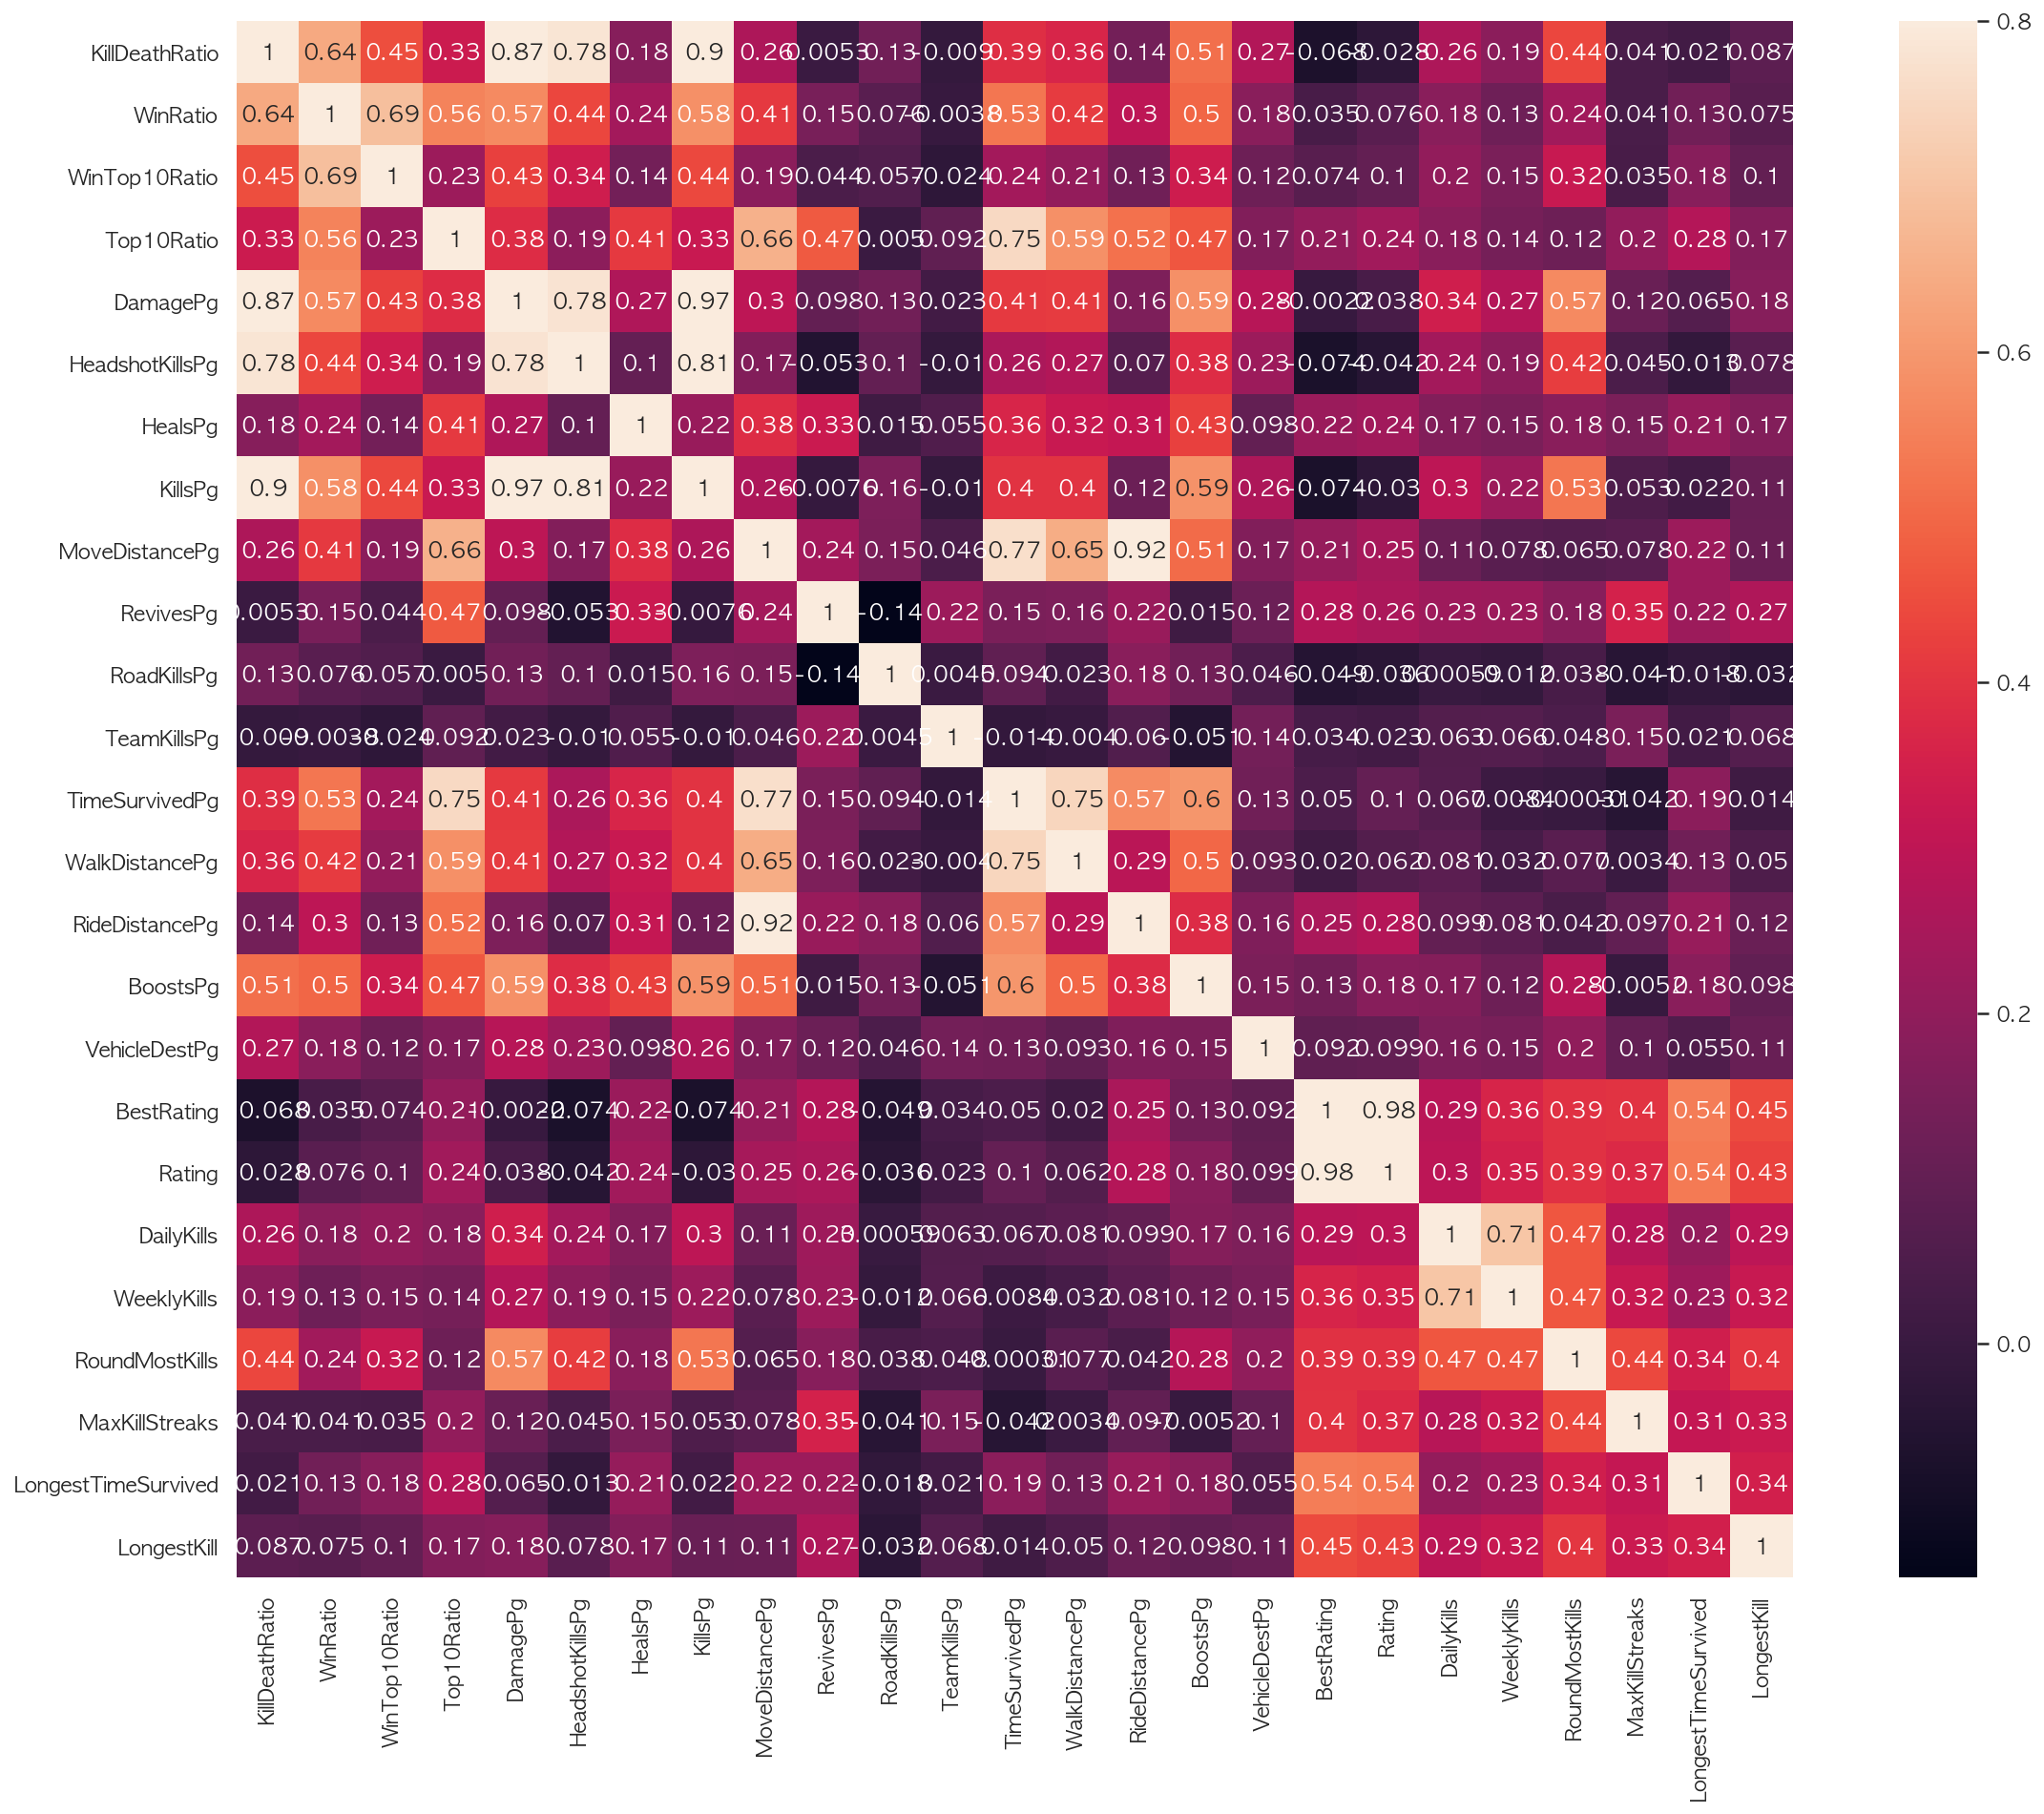

In [112]:
corrmat_total = total_ratio.corr()
f, ax = plt.subplots(figsize=(20, 15))
sns.heatmap(corrmat_total, vmax=.8, square=True, annot=True, annot_kws={"size": 12});

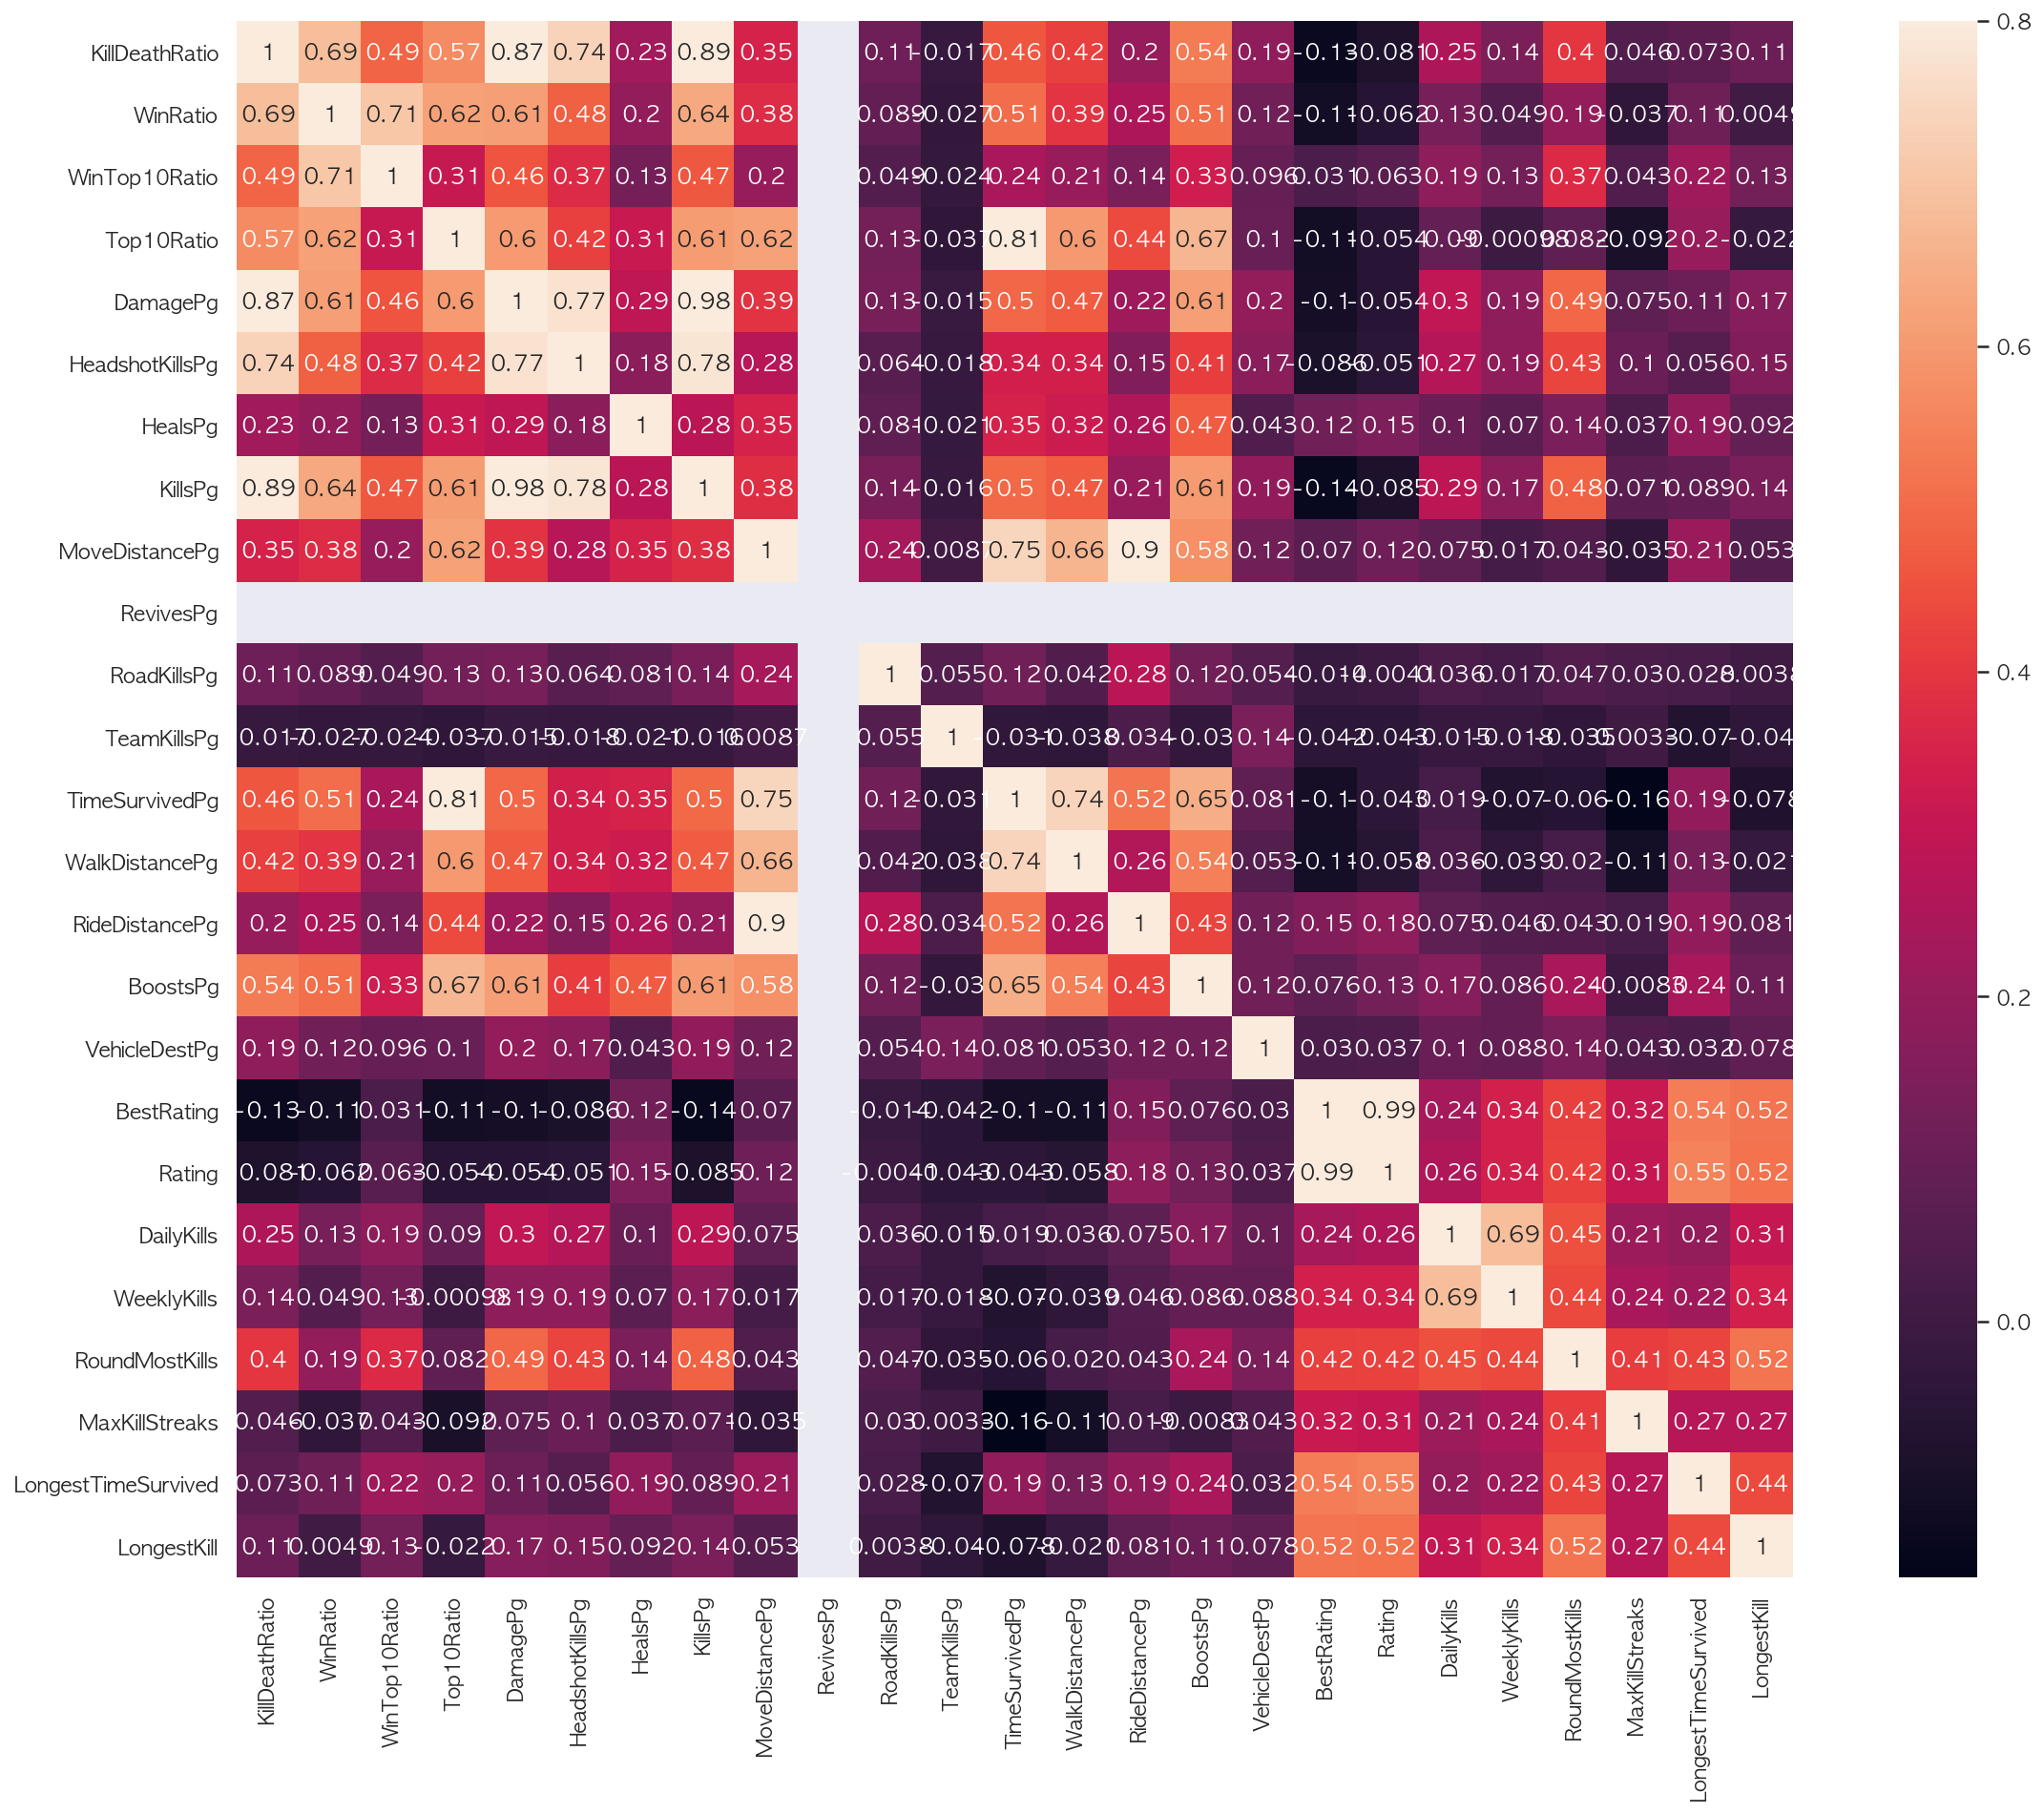

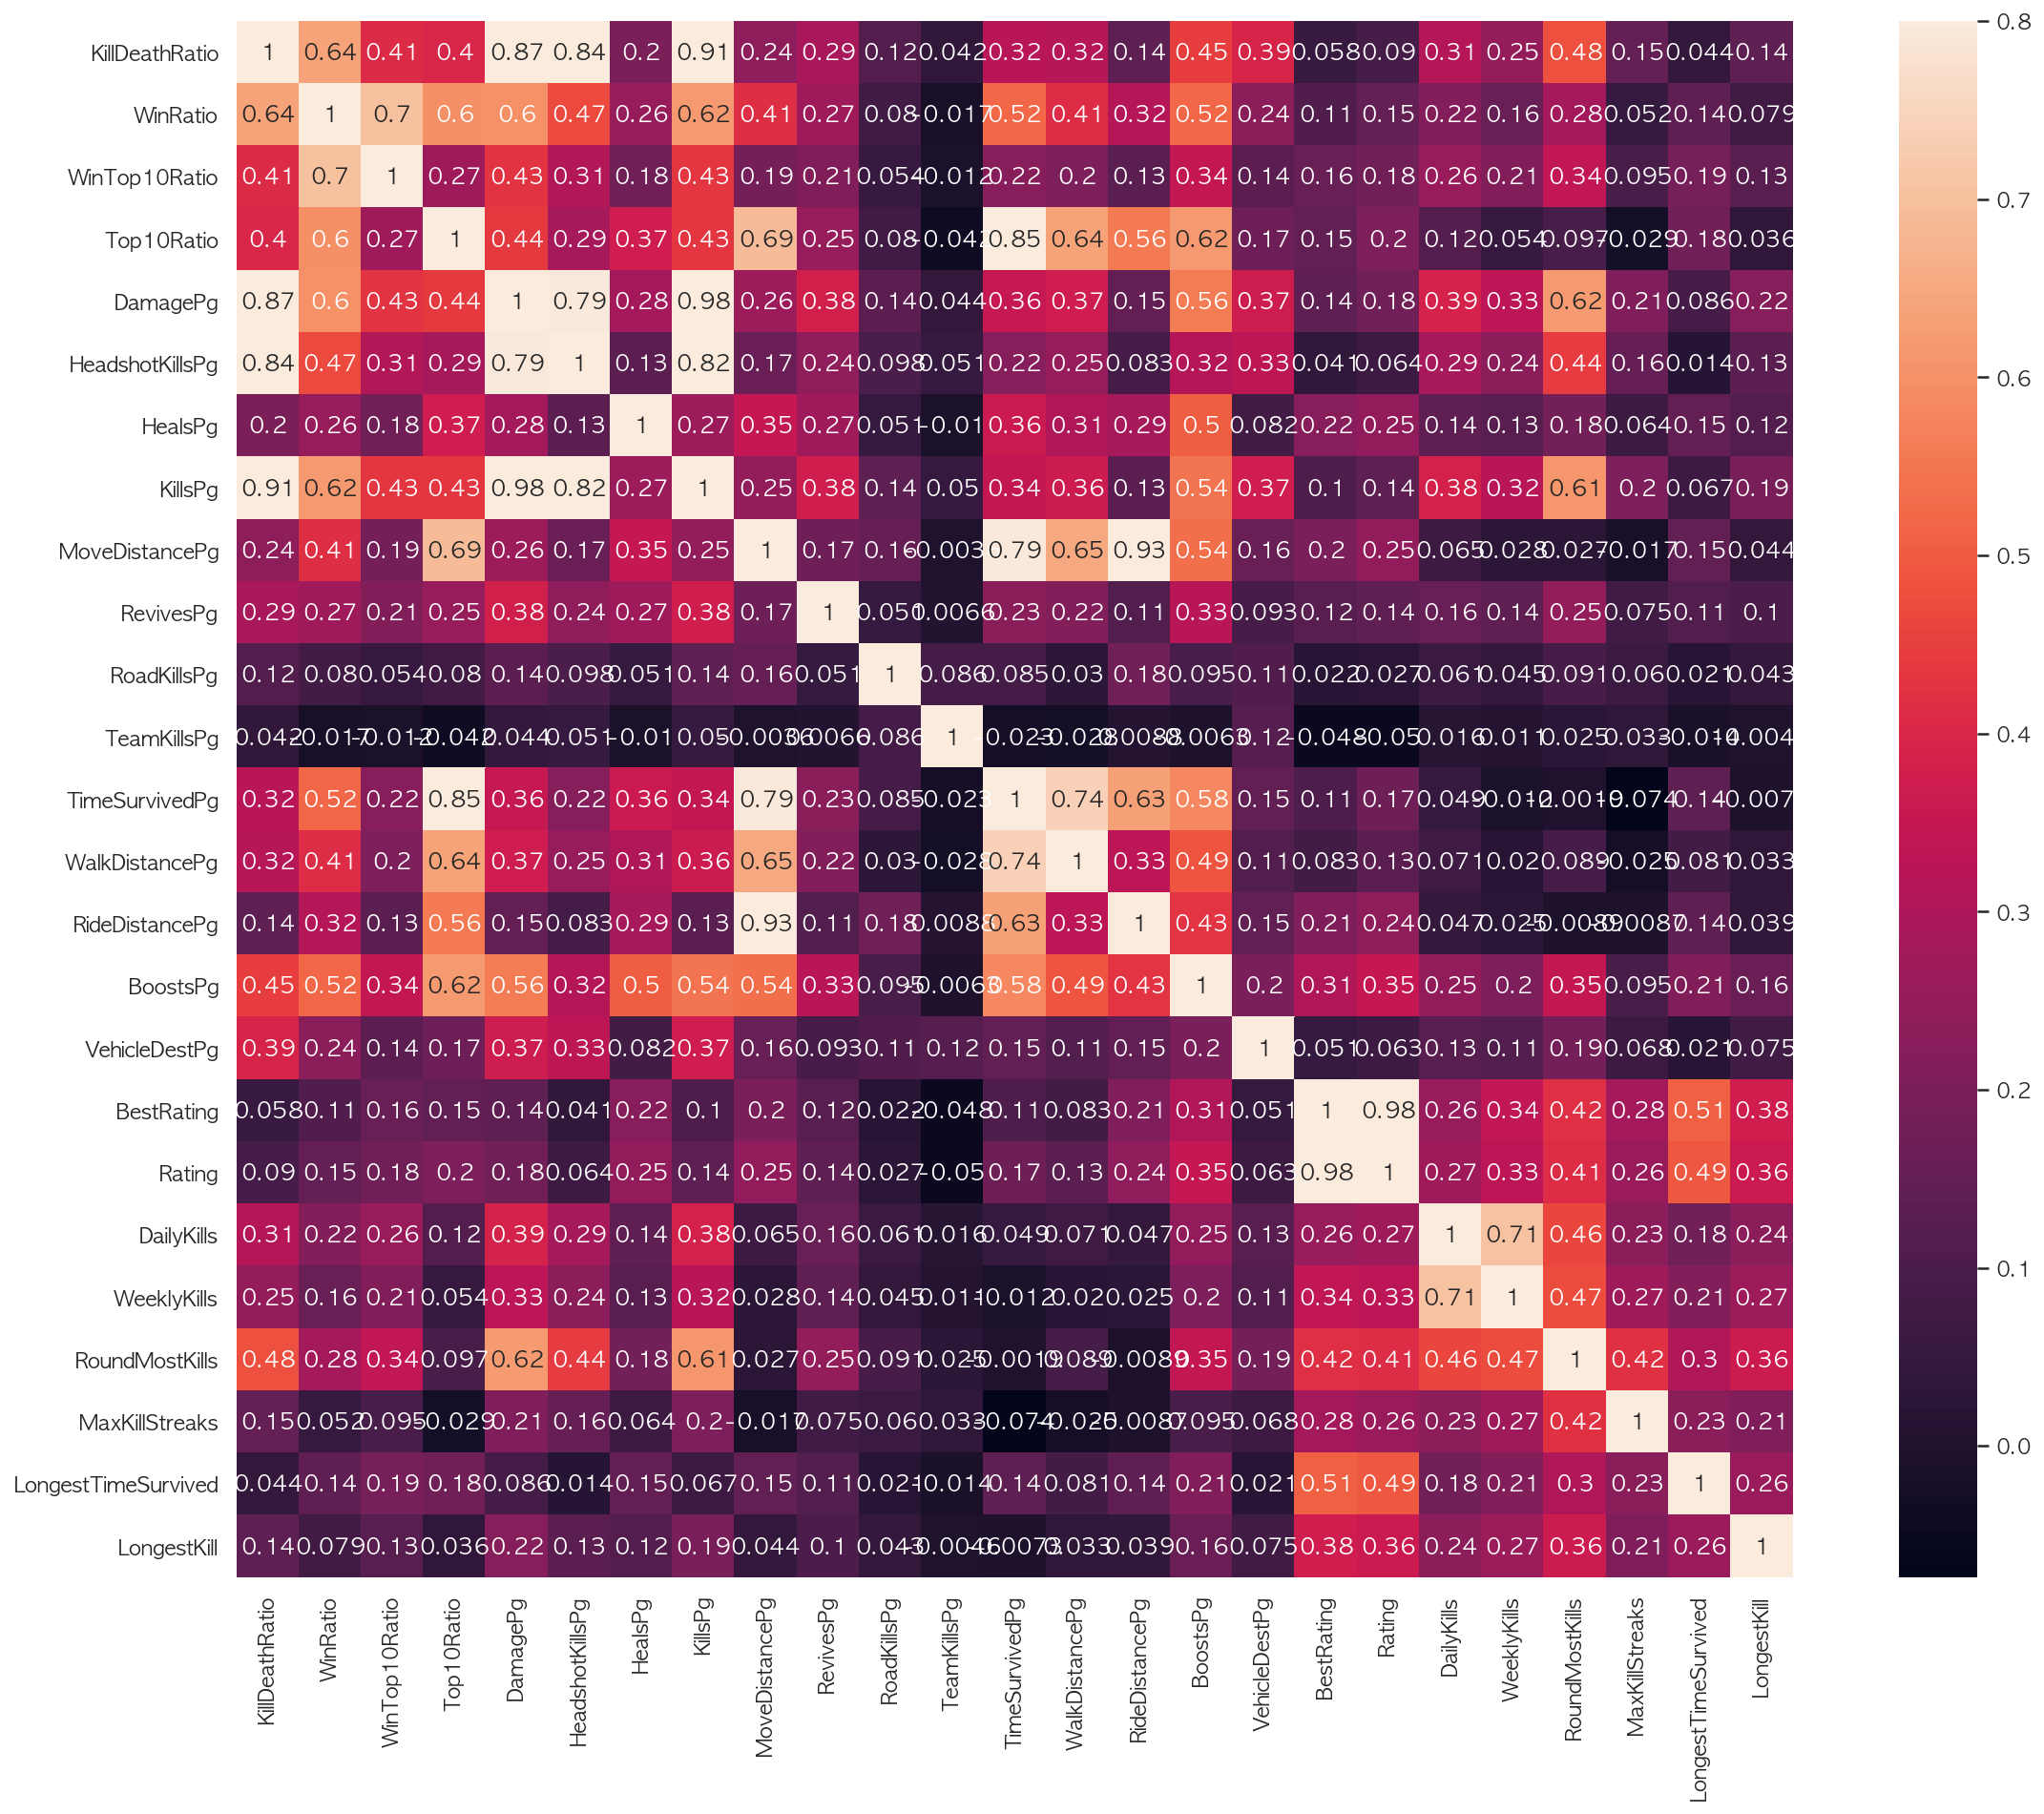

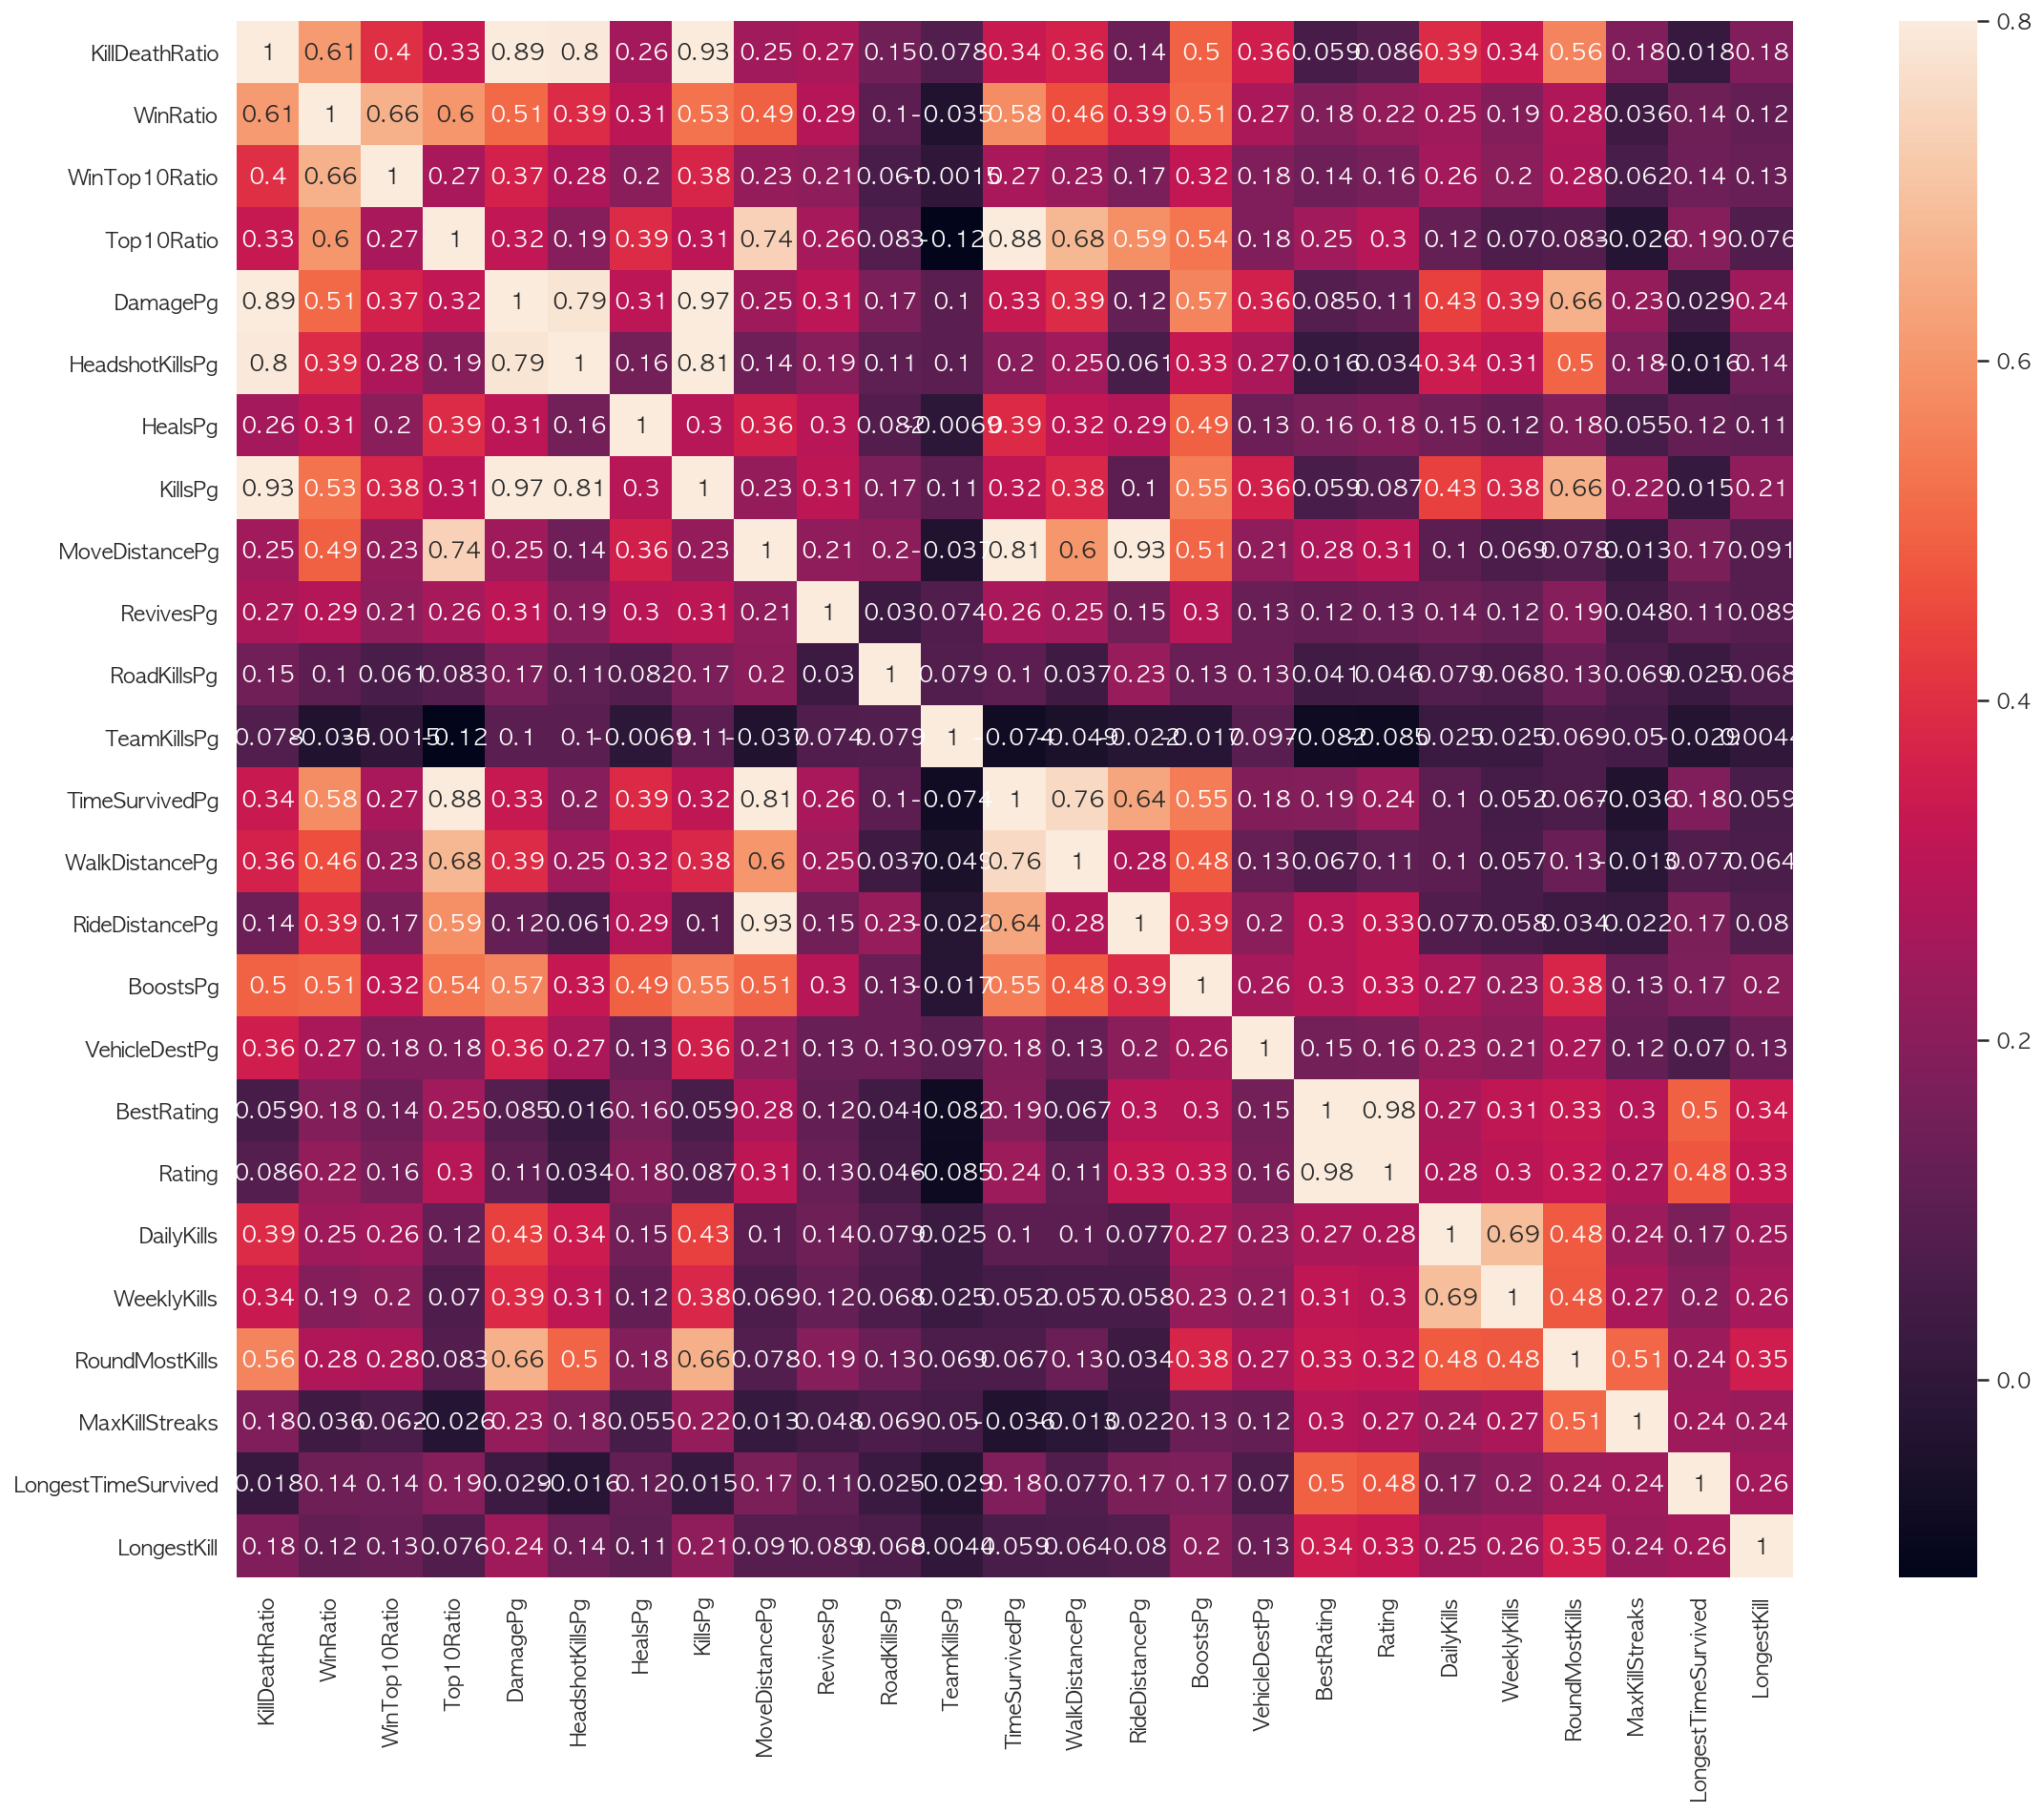

In [128]:
ls_heatmap = ['solo', 'duo', 'squad']
for value in ls_heatmap:
    globals()[f'corrmat_{value}'] = total_ratio[total_ratio['GameMode']==value].corr()
    f, ax = plt.subplots(figsize=(20, 15))
    sns.heatmap(globals()[f'corrmat_{value}'], vmax=.8, 
                square=True, annot=True, annot_kws={"size": 12});

 - 에임(=총 쏘는 실력)과 관련된 컬럼은 squad -> duo -> solo 일수록 더 높은 상관계수를 보인다.
 - 에임과 비교적 관련이 없는 컬럼은 solo -> duo -> squad 일수록 더 높은 상관관계를 보인다.
 - 에임이 안좋은 나로써는 squad나 duo를 하는것이 나은가? => 좀더 자세히 알아보자

# top10에 들어갈 확률(targrt column)과의 상관계수가 0.3 이상인 컬럼을 뽑아보자 

In [133]:
ls_2 = ['total', 'solo', 'duo', 'squad' ]

for value in ls_2:
    globals()[f"corrmat_{value}"]
    useful_col.append(globals()[f"corrmat_{value}"][globals()[f"corrmat_{value}"]["Top10Ratio"].values >= 0.3].index)
    
useful_col

Index(['KillDeathRatio', 'WinRatio', 'Top10Ratio', 'DamagePg', 'HealsPg',
       'KillsPg', 'MoveDistancePg', 'RevivesPg', 'TimeSurvivedPg',
       'WalkDistancePg', 'RideDistancePg', 'BoostsPg'],
      dtype='object')

## 세부가설 1. Kill/Death를 높이면 TOP10에 들어갈 확률이 높아질것이다. 
#### KillDeathRatio (physical 관련 컬럼)

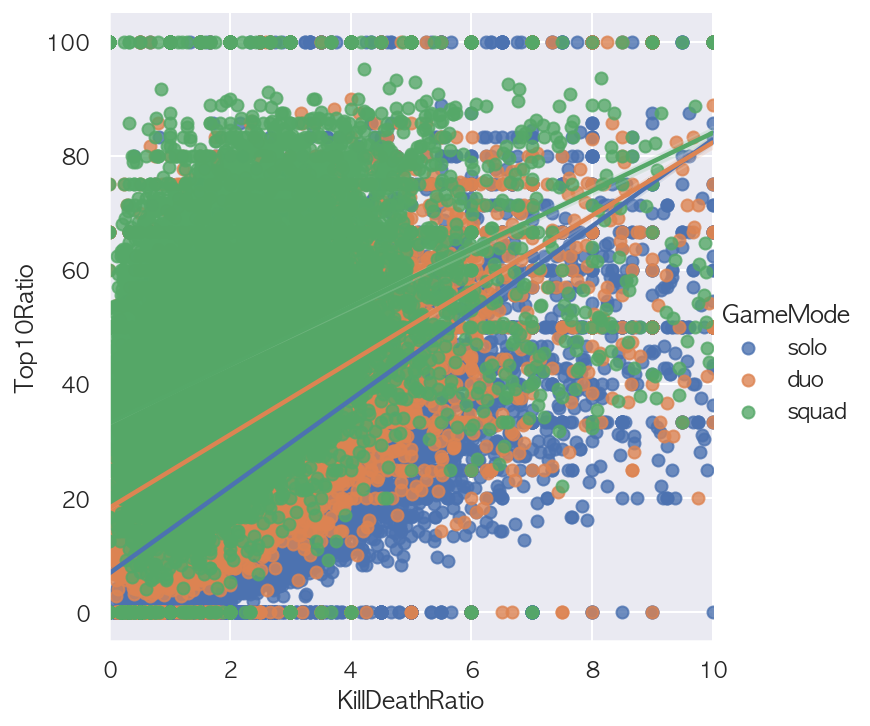

In [105]:
sns.lmplot(x="KillDeathRatio", y="Top10Ratio", hue="GameMode", 
           data=total_ratio[(total_ratio['KillDeathRatio']<=10)&(total_ratio['Top10Ratio']<=100)])

- 듀오, 스쿼드, 솔로 모두 탑10에 들어가는 비율과 양의 상관관계를 보인다.
- 선형 직선의 기울기가 가장 완만하다. 
- => 탑10에 들어갈 확률에 총 쏘는 실력이라는 변수가 영향을주는 정도가 가장 둔하다고 말할수있다.

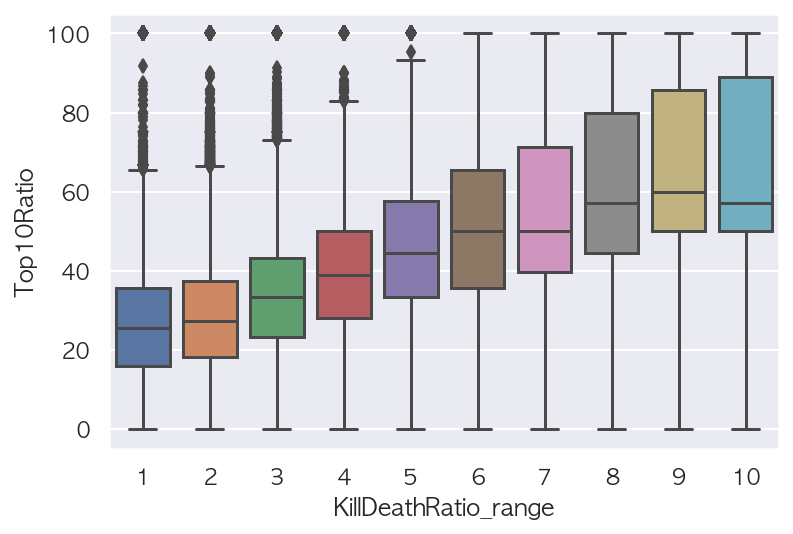

In [106]:
create_range_data(total_ratio, "KillDeathRatio", 0, 10, 1)

sns.boxplot(x="KillDeathRatio_range", y="Top10Ratio", data=total_ratio)

plt.show();

drop_col(total_ratio, "KillDeathRatio")

- 킬수가 많을수록 탑10에 들어갈 확률이 커진다.
- 하지만 kill수가 4명 이상이되면 탑10에 들어가는 확률에 미치는 영향이 줄어든다.
- 한판당 4~5명을 죽인다면 탑10에 들어갈 확률을 40이상 만들수 있다.

## 세부가설 2. 상대에게 Damege를 많이 입히면 TOP10에 들어갈 확률이 높아질것이다.

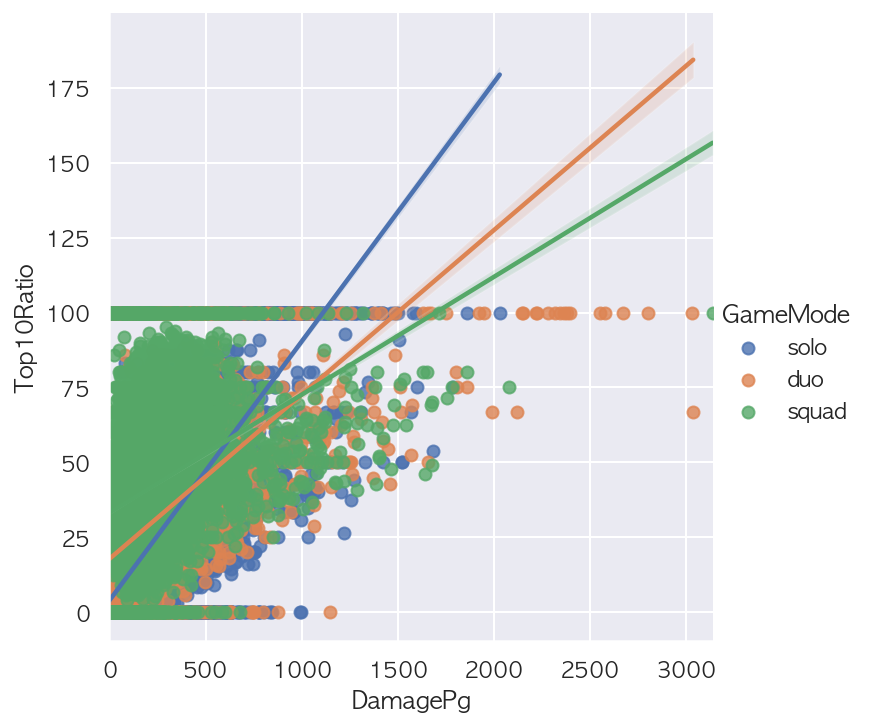

In [107]:
sns.lmplot(x="DamagePg", y="Top10Ratio", hue="GameMode", data=total_ratio)

- 

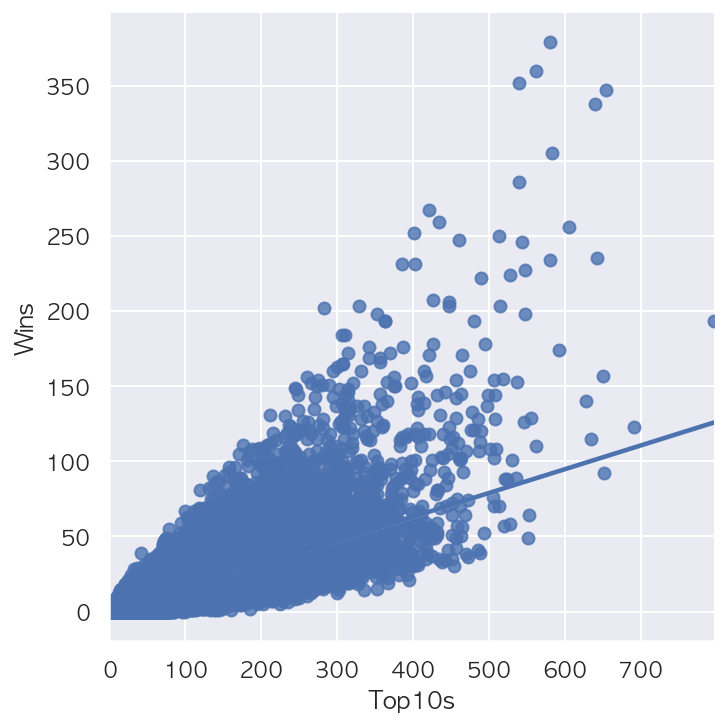

In [104]:
sns.lmplot(x="Top10s", y="Wins", data=total)


In [ ]:
sns.jointplot(x='KillDeathRatio', y='Top10Ratio', data=total_ratio)

In [95]:
sns.cubehelix_palette(10, rot=-.25, light=.7)
sns.FacetGrid(total_ratio, row="KillDeathRatio", hue="Top10Ratio_range", aspect=15, height=.5, palette=pal)

ValueError: Image size of 1080x80280 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 540x40140 with 1115 Axes>

### top10ratio 10등분하여 데이터 범주화

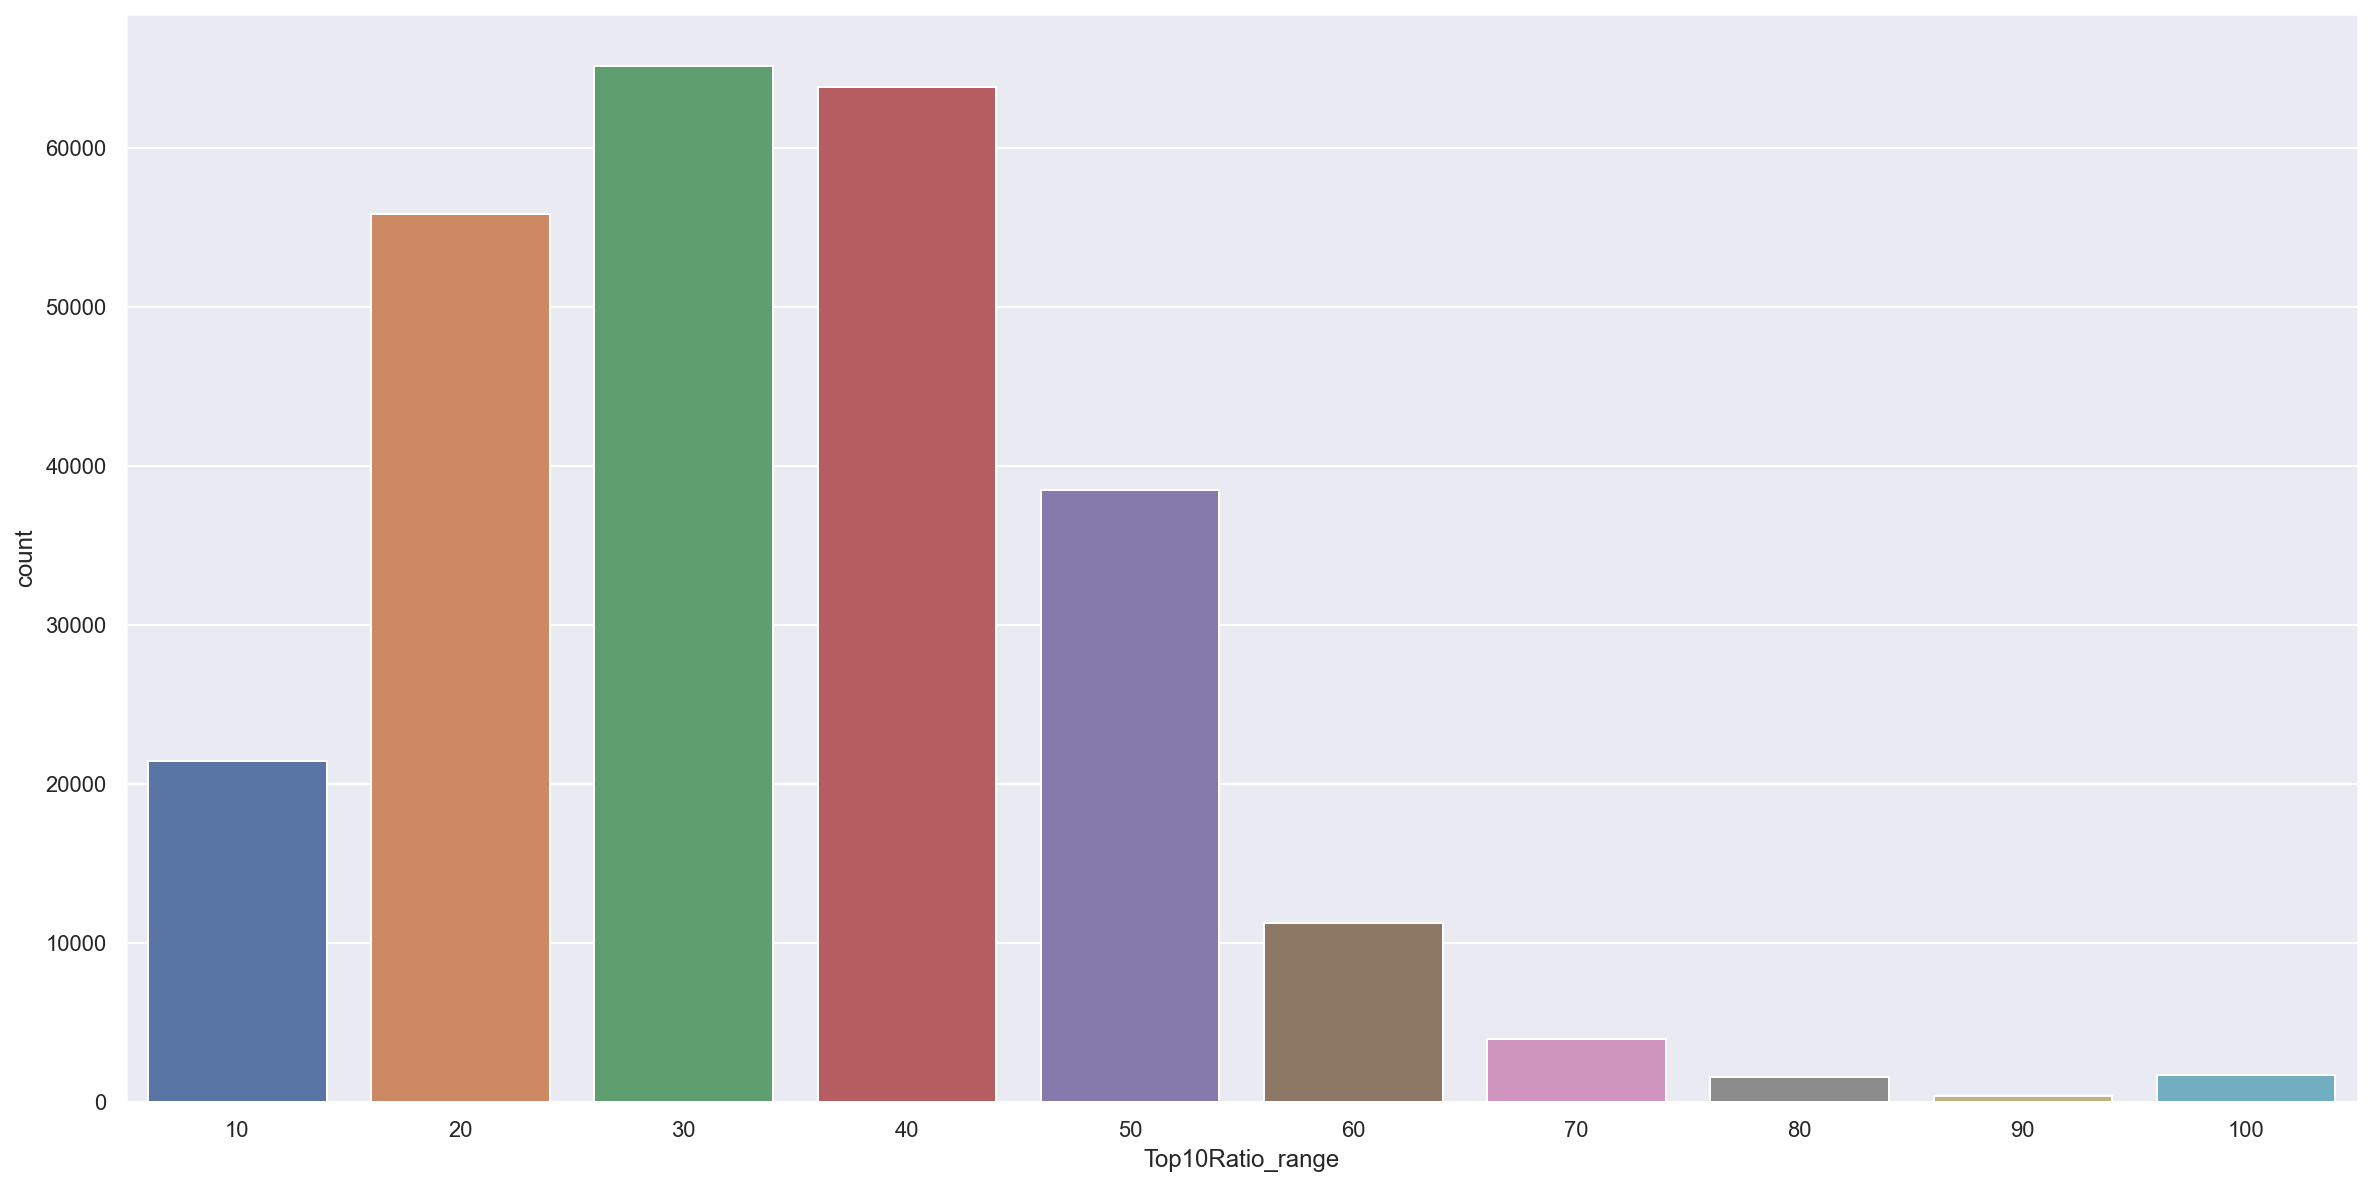

In [39]:
import seaborn as sns

plt.figure(figsize=(20,10))
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="Top10Ratio_range", data=total_ratio)


### top10에 들어갈 확률이 90-100인 유저들이 많은것이 의심스럽다

In [16]:
a = pd.DataFrame(total_ratio['Top10Ratio_range'])
a.groupby(['Top10Ratio_range']).size().reset_index(name='count')

Top10Ratio_range  count
0               10  21453
1               20  55865
2               30  65182
3               40  63873
4               50  38504
5               60  11252
6               70   3956
7               80   1568
8               90    356
9              100   1685

In [17]:
b = pd.DataFrame(total_ratio[['Top10Ratio','Top10Ratio_range']])
b.groupby(['Top10Ratio_range']).mean().reset_index()

Top10Ratio_range  Top10Ratio
0               10    5.516128
1               20   15.607652
2               30   25.122199
3               40   35.002882
4               50   44.810804
5               60   54.589673
6               70   64.665445
7               80   74.727742
8               90   84.269663
9              100   99.909674

### 보통의 플레이어가 가장 많다(KD 1~2)

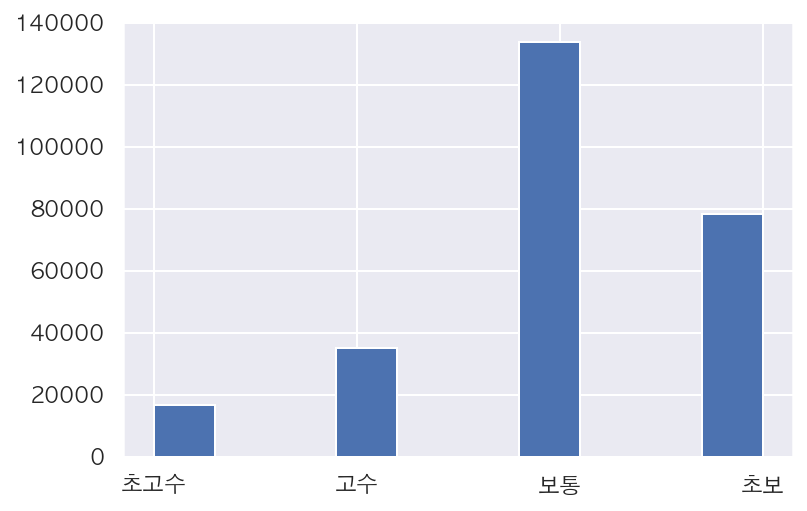

In [19]:
plt.rcParams['font.family'] = 'AppleGothic'
plt.hist(total_ratio['K/D_category'])
plt.show()

### 보통의 에임을 가지고있는 유저들 중 탑10에 들어가는 비율이 10~20%정도가 가장 많다.

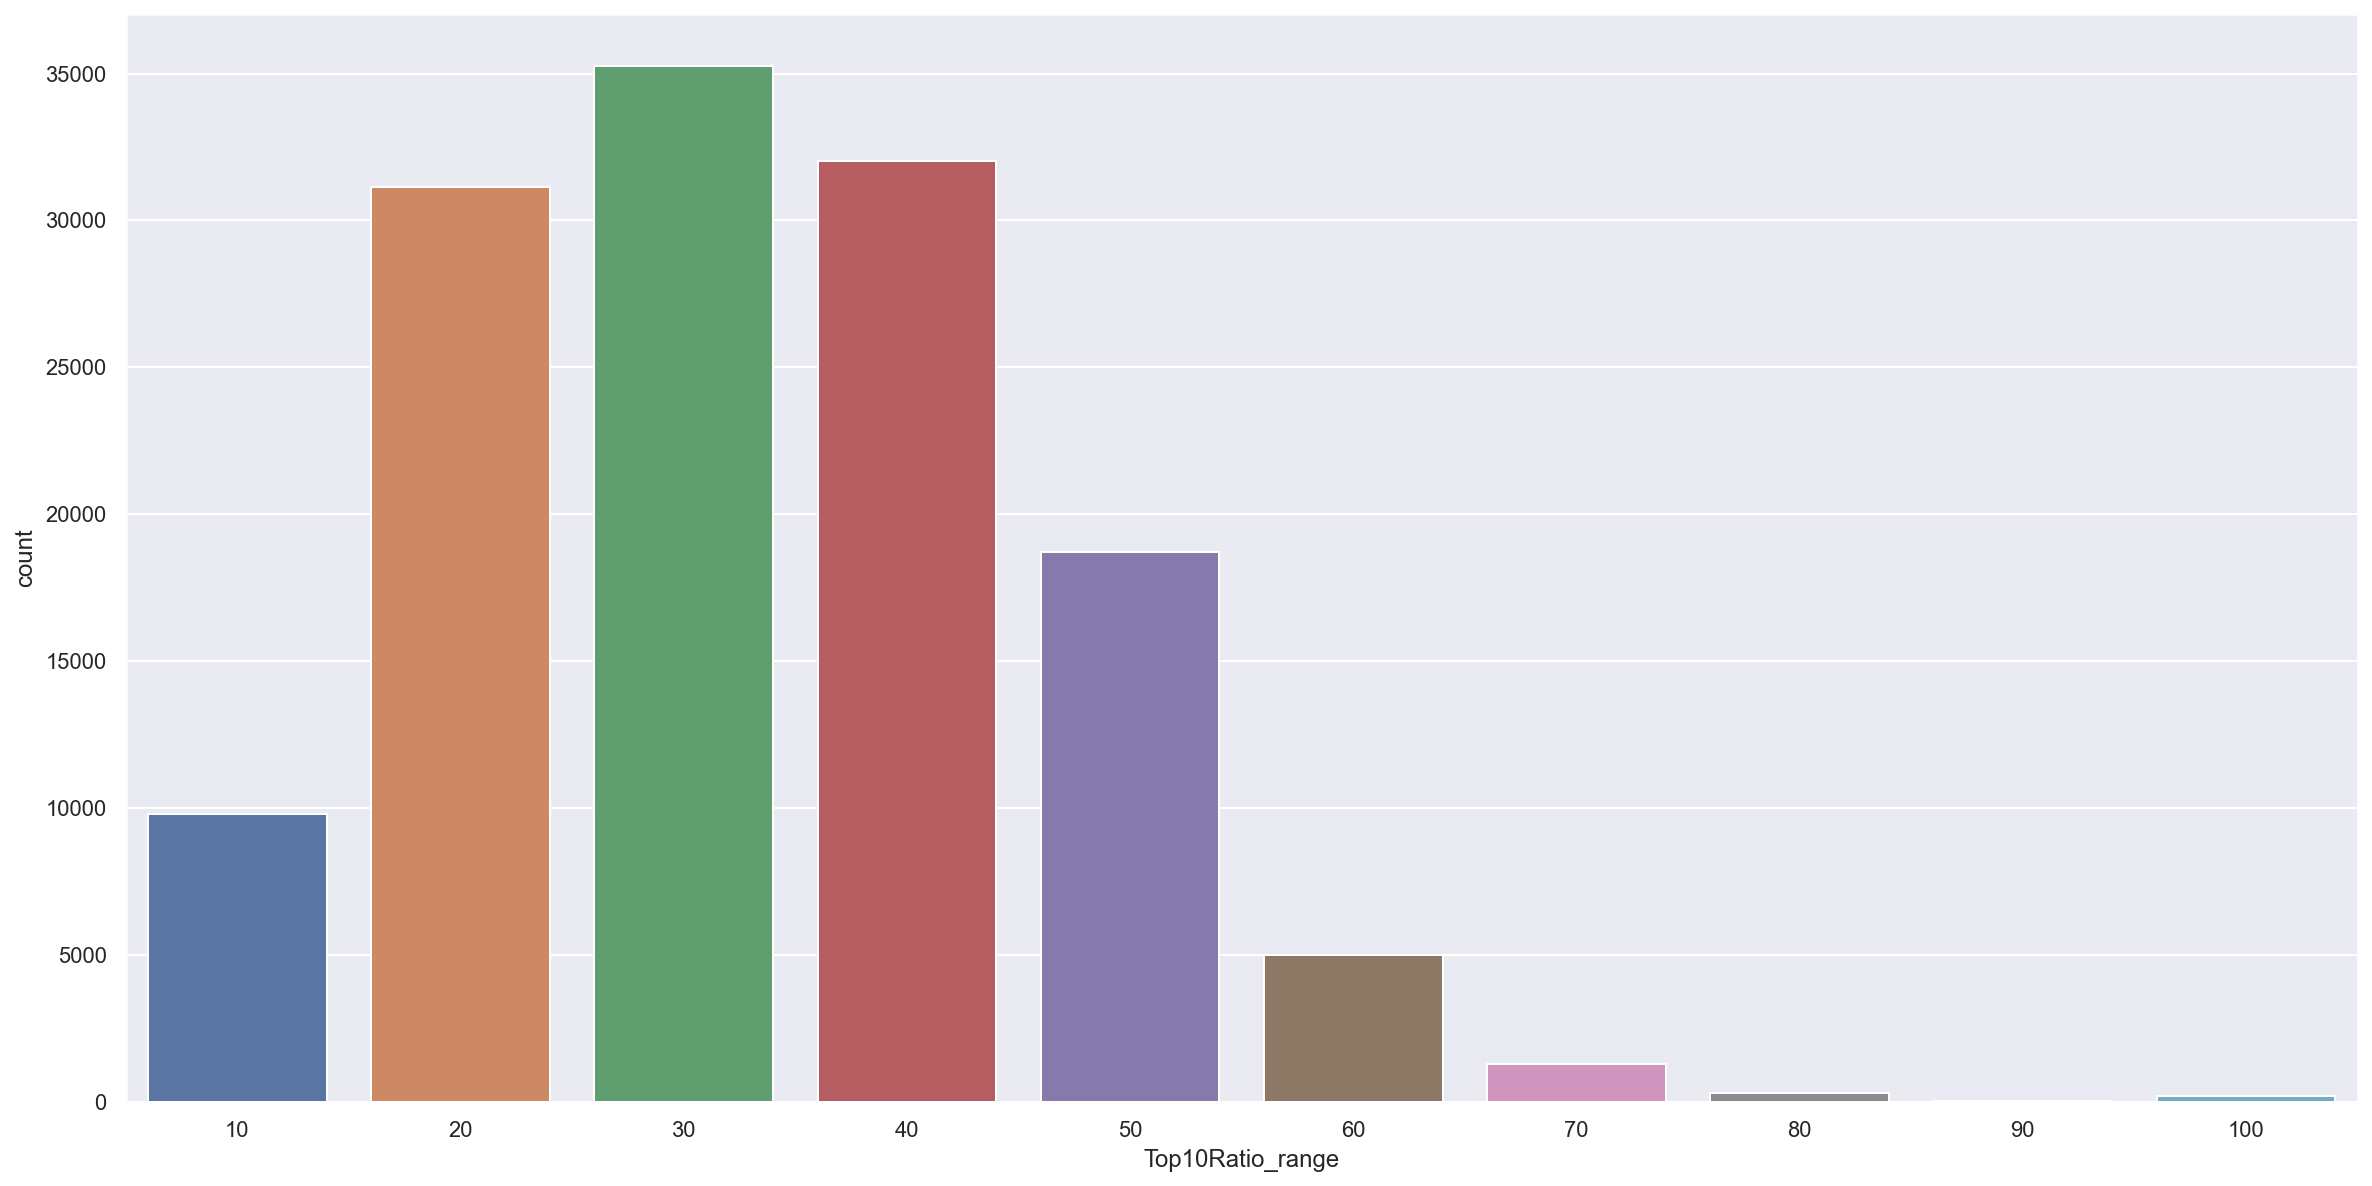

In [38]:
import seaborn as sns
plt.figure(figsize=(20,10))
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="Top10Ratio_range", data=total_ratio[total_ratio['K/D_category']=="보통"])



In [21]:
total_ratio

KillDeathRatio  WinRatio  WinTop10Ratio  Top10Ratio  DamagePg  \
0                 3.14  0.176471           0.83        23.5    255.36   
1                 4.41  0.181818           0.36        33.3    393.04   
2                 3.60  0.000000           0.00        20.0    329.76   
3                14.00  0.500000           0.67        75.0    751.95   
4                10.50  0.333333           0.40        83.3    637.48   
...                ...       ...            ...         ...       ...   
263689            0.94  0.035714           0.05        41.1    130.10   
263690            1.42  0.086957           0.07        40.2    156.96   
263691            0.90  0.014599           0.18        29.9    116.34   
263692            2.88  0.159509           0.41        63.8    348.90   
263693            0.84  0.024096           0.05        27.7    119.09   

        HeadshotKillsPg  HealsPg  KillsPg  MoveDistancePg  RevivesPg  \
0                  0.65     1.94     2.59         3321.28       0.00   
1                  1.27     1.82     3.61         5021.41       0.00   
2                  0.60     1.00     3.60         2804.80       0.00   
3                  0.50     1.00     7.00         5986.82       0.00   
4                  1.50     2.00     7.00         6526.96       0.00   
...                 ...      ...      ...             ...        ...   
263689             0.16     2.43     0.91         3775.38       0.27   
263690             0.14     1.55     1.29         2632.12       0.28   
263691             0.08     1.15     0.89         2804.78       0.18   
263692             0.47     2.44     2.42         5234.55       0.24   
263693             0.16     0.93     0.82         3015.69       0.17   

        RoadKillsPg  TeamKillsPg  TimeSurvivedPg  WalkDistancePg  \
0              0.00         0.00         1086.42     1701.430000   
1              0.06         0.00         1000.45     1450.568788   
2              0.00         0.00          866.09     1268.158000   
3              0.00         0.00         1677.73     2197.461250   
4              0.00         0.00         1640.17     2789.401667   
...             ...          ...             ...             ...   
263689         0.00         0.11         1106.92     1894.640000   
263690         0.00         0.09          978.54     1565.724674   
263691         0.01         0.02          926.20     1512.347007   
263692         0.02         0.04         1354.00     2025.640736   
263693         0.01         0.05          947.27     1559.862470   

        RideDistancePg  BoostsPg  VehicleDestPg  BestRating   Rating  \
0          1619.854706  1.705882       0.000000     1415.79  1559.78   
1          3570.840606  2.666667       0.090909     1860.74  1884.53   
2          1536.640000  0.600000       0.000000     1266.60  1255.92   
3          3789.353750  3.000000       0.000000     1765.13  1798.70   
4          3737.560000  3.500000       0.000000     1616.58  1668.67   
...                ...       ...            ...         ...      ...   
263689     1880.738750  1.250000       0.017857     1648.14  1625.68   
263690     1066.392826  0.782609       0.010870     1923.01  1912.70   
263691     1292.428613  0.693431       0.014599     1758.74  1727.56   
263692     3208.913067  1.944785       0.085890     2311.73  2311.01   
263693     1455.828614  0.903614       0.000000     1562.32  1548.62   

        DailyKills  WeeklyKills  RoundMostKills  MaxKillStreaks  \
0               13           19              13               1   
1               18           18              13               3   
2                1           18              10               1   
3                8           48              14               2   
4               15           29              13               3   
...            ...          ...             ...             ...   
263689           0            0               6               3   
263690           2            3               9 

## Heal아이템 사용개수
#### 에임이 안좋은 유저일수록 heal item을 적게 사용한다.

초고수 평균: 2.39 고수 평균: 2.35 보통 평균: 2.13 초보 평균: 1.83


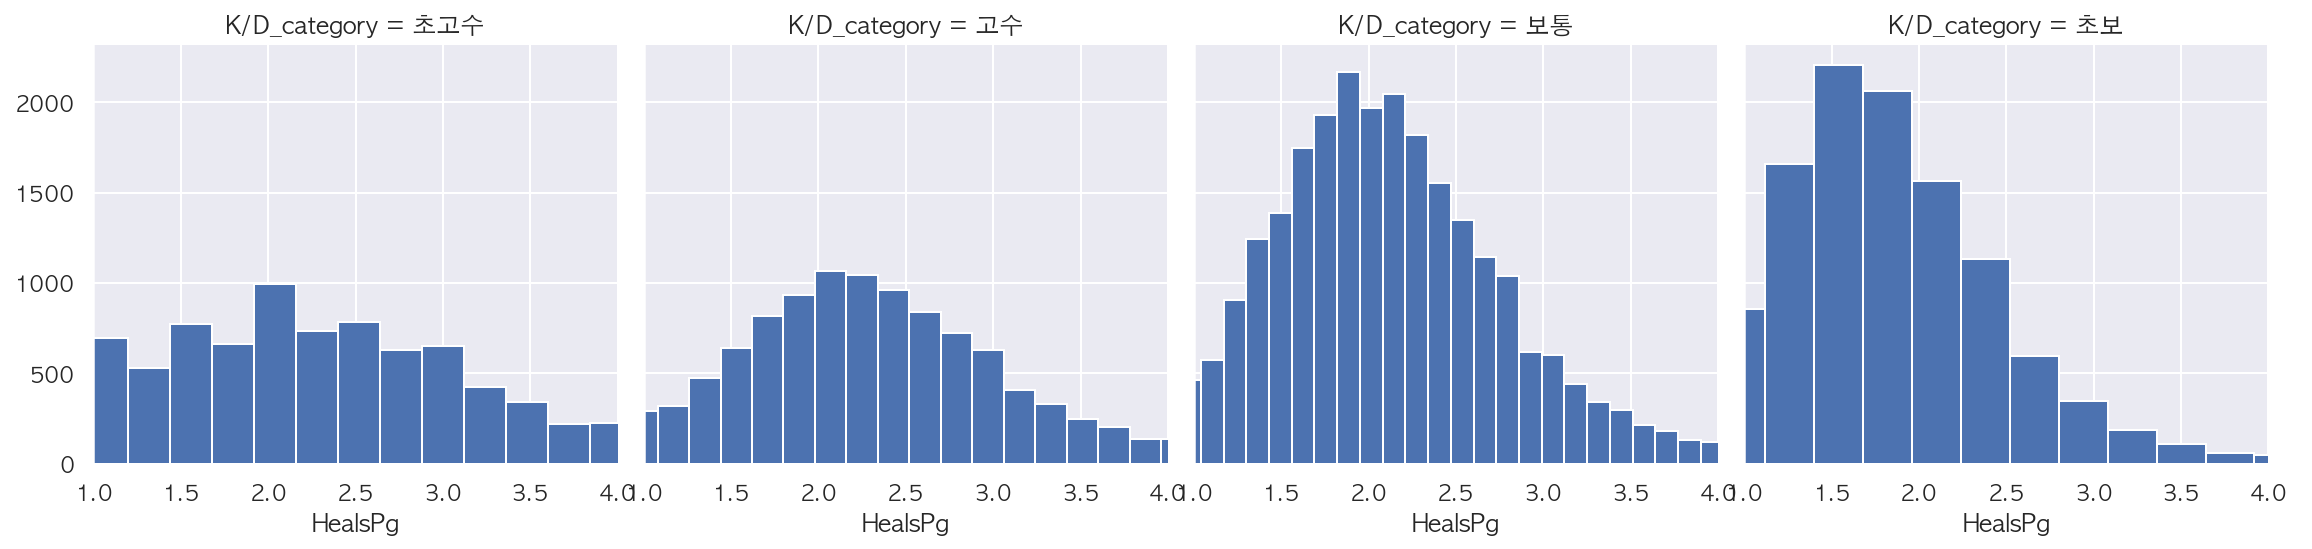

In [60]:
plt.rcParams['font.family'] = 'AppleGothic'

grid = sns.FacetGrid(total_ratio[total_ratio['WinRaio_GoodBad'] == 'good'], col='K/D_category', height=4)
grid.map(plt.hist,'HealsPg',bins=100)
grid.add_legend();
plt.xlim(1,4)


print("초고수 평균:",round(total_ratio[(total_ratio['WinRaio_GoodBad'] == 'good')&(total_ratio['K/D_category'] == '초고수')]['HealsPg'].mean(),2),
     "고수 평균:",round(total_ratio[(total_ratio['WinRaio_GoodBad'] == 'good')&(total_ratio['K/D_category'] == '고수')]['HealsPg'].mean(),2),
     "보통 평균:",round(total_ratio[(total_ratio['WinRaio_GoodBad'] == 'good')&(total_ratio['K/D_category'] == '보통')]['HealsPg'].mean(),2),
     "초보 평균:",round(total_ratio[(total_ratio['WinRaio_GoodBad'] == 'good')&(total_ratio['K/D_category'] == '초보')]['HealsPg'].mean(),2))



## boosting item
#### boosting item 사용개수는 에임이 안좋은 유저일수록 덜 사용했다.

초고수 평균: 2.76 고수 평균: 1.99 보통 평균: 1.53 초보 평균: 1.12


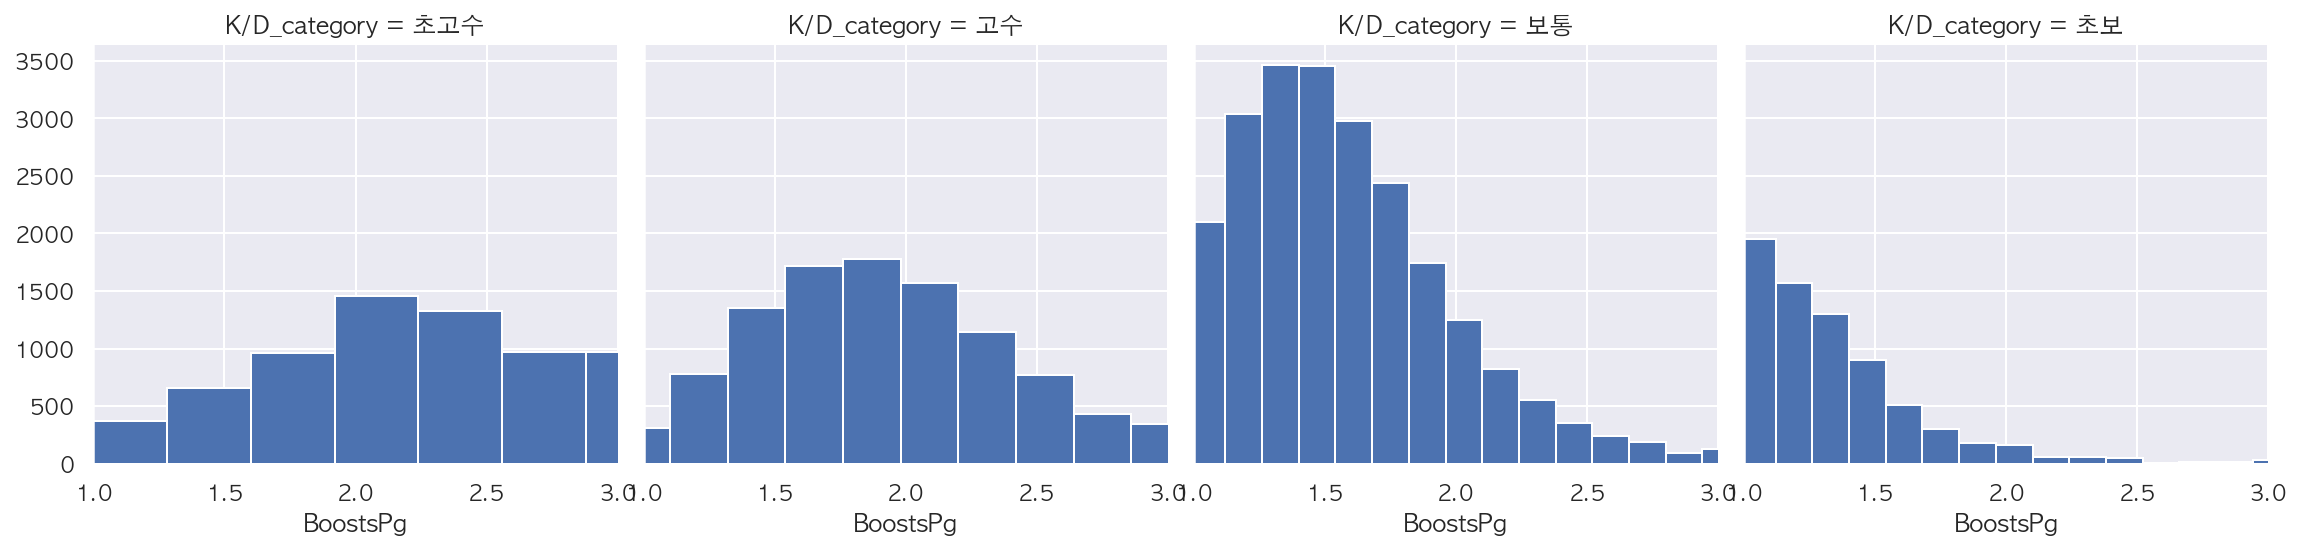

In [62]:
plt.rcParams['font.family'] = 'AppleGothic'

grid = sns.FacetGrid(total_ratio[total_ratio['WinRaio_GoodBad'] == 'good'], col='K/D_category', height=4)
grid.map(plt.hist,'BoostsPg',bins=50)
grid.add_legend();
plt.xlim(1,3)

print("초고수 평균:",round(total_ratio[(total_ratio['WinRaio_GoodBad'] == 'good')&(total_ratio['K/D_category'] == '초고수')]['BoostsPg'].mean(),2),
     "고수 평균:",round(total_ratio[(total_ratio['WinRaio_GoodBad'] == 'good')&(total_ratio['K/D_category'] == '고수')]['BoostsPg'].mean(),2),
     "보통 평균:",round(total_ratio[(total_ratio['WinRaio_GoodBad'] == 'good')&(total_ratio['K/D_category'] == '보통')]['BoostsPg'].mean(),2),
     "초보 평균:",round(total_ratio[(total_ratio['WinRaio_GoodBad'] == 'good')&(total_ratio['K/D_category'] == '초보')]['BoostsPg'].mean(),2))


## 움직이는 거리 
#### 에임이 안좋은 유저일수록 적게 걸어다닌다.

초고수 평균: 4554.82 고수 평균: 4147.37 보통 평균: 3898.08 초보 평균: 3750.41


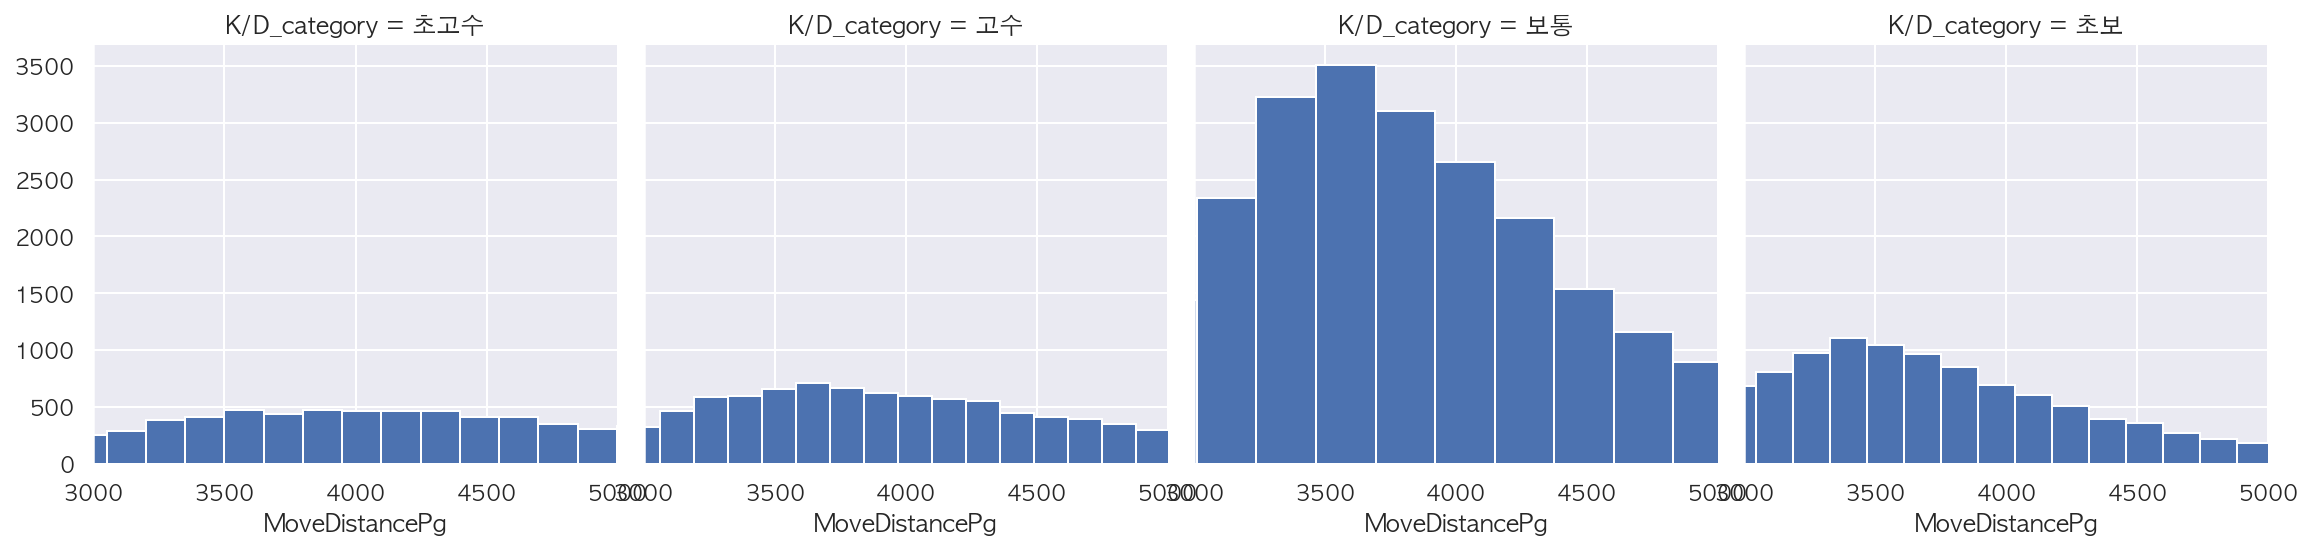

In [68]:
plt.rcParams['font.family'] = 'AppleGothic'

grid = sns.FacetGrid(total_ratio[total_ratio['WinRaio_GoodBad'] == 'good'], col='K/D_category', height=4)
grid.map(plt.hist,'MoveDistancePg',bins=100)
grid.add_legend();
plt.xlim(3000,5000)

print("초고수 평균:",round(total_ratio[(total_ratio['WinRaio_GoodBad'] == 'good')&(total_ratio['K/D_category'] == '초고수')]['MoveDistancePg'].mean(),2),
     "고수 평균:",round(total_ratio[(total_ratio['WinRaio_GoodBad'] == 'good')&(total_ratio['K/D_category'] == '고수')]['MoveDistancePg'].mean(),2),
     "보통 평균:",round(total_ratio[(total_ratio['WinRaio_GoodBad'] == 'good')&(total_ratio['K/D_category'] == '보통')]['MoveDistancePg'].mean(),2),
     "초보 평균:",round(total_ratio[(total_ratio['WinRaio_GoodBad'] == 'good')&(total_ratio['K/D_category'] == '초보')]['MoveDistancePg'].mean(),2))


## 걸어다닌 거리
### 에임이 안좋은 유저일수록 덜 걸어다닌다  ==> 에임이 안좋을수록 존버를 했다고 판단된다.

초고수 평균: 2244.37 고수 평균: 1927.66 보통 평균: 1771.69 초보 평균: 1675.43


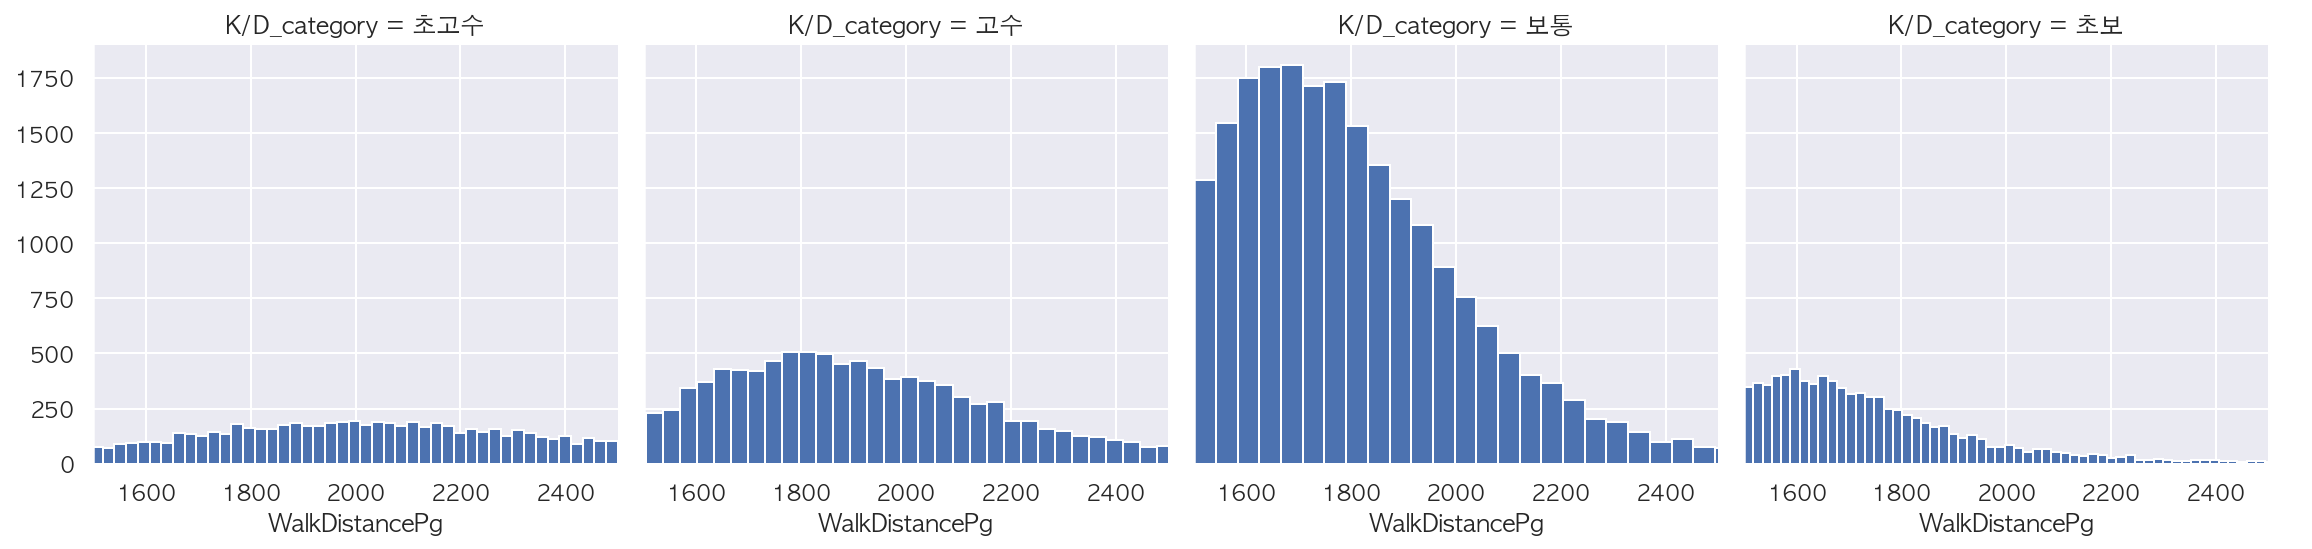

In [69]:
#total_WalkDistancePg
#에임이 안좋을수록 덜 걸어다닌다. ==> 존버의 가능성 있음.

plt.rcParams['font.family'] = 'AppleGothic'

grid = sns.FacetGrid(total_ratio[total_ratio['WinRaio_GoodBad'] == 'good'], col='K/D_category', height=4)
grid.map(plt.hist,'WalkDistancePg',bins=300)
grid.add_legend();
plt.xlim(1500,2500)

print("초고수 평균:",round(total_ratio[(total_ratio['WinRaio_GoodBad'] == 'good')&(total_ratio['K/D_category'] == '초고수')]['WalkDistancePg'].mean(),2),
     "고수 평균:",round(total_ratio[(total_ratio['WinRaio_GoodBad'] == 'good')&(total_ratio['K/D_category'] == '고수')]['WalkDistancePg'].mean(),2),
     "보통 평균:",round(total_ratio[(total_ratio['WinRaio_GoodBad'] == 'good')&(total_ratio['K/D_category'] == '보통')]['WalkDistancePg'].mean(),2),
     "초보 평균:",round(total_ratio[(total_ratio['WinRaio_GoodBad'] == 'good')&(total_ratio['K/D_category'] == '초보')]['WalkDistancePg'].mean(),2))


## 차를 타고다닌 거리
#### 에임이 안좋은 유저일수록 차를 타고다닌 거리가 짧다. 
#### ==> 차를 타면 소리가 나기 때문에 에임이 안좋은 유저들은 비교적 덜 타고 다닌걸로 판단됨.

초고수 평균: 2310.45 고수 평균: 2219.71 보통 평균: 2126.39 초보 평균: 2074.98


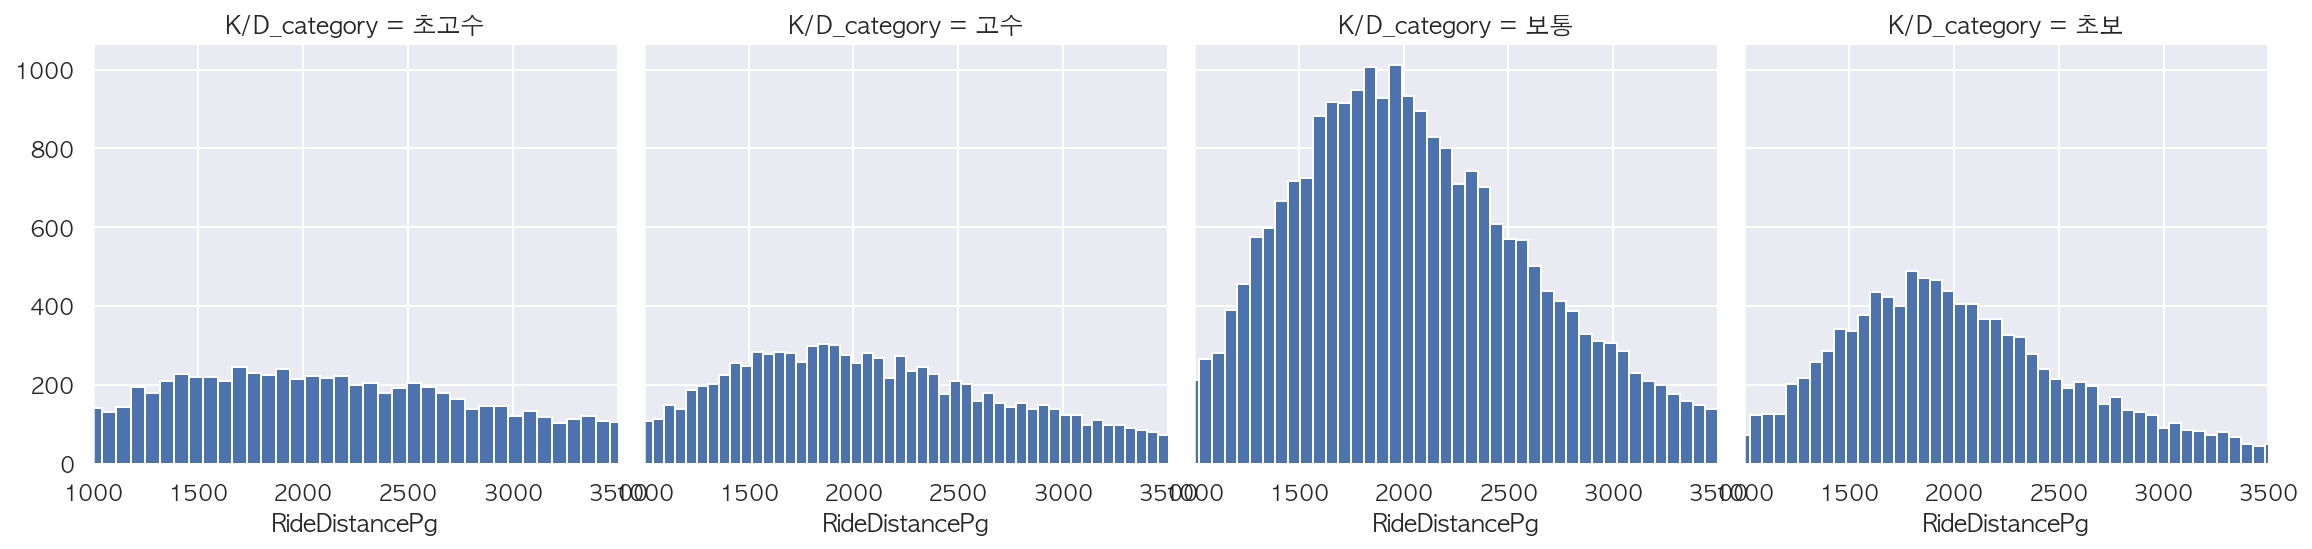

In [73]:
plt.rcParams['font.family'] = 'AppleGothic'

grid = sns.FacetGrid(total_ratio[total_ratio['WinRaio_GoodBad'] == 'good'], col='K/D_category', height=4)
grid.map(plt.hist,'RideDistancePg',bins=200)
grid.add_legend();
plt.xlim(1000,3500)

print("초고수 평균:",round(total_ratio[(total_ratio['WinRaio_GoodBad'] == 'good')&(total_ratio['K/D_category'] == '초고수')]['RideDistancePg'].mean(),2),
     "고수 평균:",round(total_ratio[(total_ratio['WinRaio_GoodBad'] == 'good')&(total_ratio['K/D_category'] == '고수')]['RideDistancePg'].mean(),2),
     "보통 평균:",round(total_ratio[(total_ratio['WinRaio_GoodBad'] == 'good')&(total_ratio['K/D_category'] == '보통')]['RideDistancePg'].mean(),2),
     "초보 평균:",round(total_ratio[(total_ratio['WinRaio_GoodBad'] == 'good')&(total_ratio['K/D_category'] == '초보')]['RideDistancePg'].mean(),2))
